# EXAMEN STATISTIQUE MULTIVARIEE  2025

# Master Calcul Scientifique et Modelisation | 
# Etudiant : YAYA TOURE  | Email : yaya.toure@unchk..edu.sn
# Enseignant: Dr PO CISSE

### **Introduction : Analyse des Facteurs Influant sur le Niveau de Revenu**  

Dans un monde en constante évolution, l’étude des facteurs influençant le revenu des individus revêt une importance capitale, tant pour les chercheurs que pour les décideurs économiques et sociaux. Ce projet vise à appliquer différentes techniques statistiques et analytiques afin d’explorer les relations entre les variables socio-économiques et le niveau de revenu, en utilisant le jeu de données **Adult** provenant de l’**UCI Machine Learning Repository**.  

L’objectif principal est de mettre en œuvre une approche rigoureuse basée sur des **méthodes statistiques avancées** telles que :  
✔ **La Régression Multiple**, pour identifier les variables ayant un impact significatif sur le revenu.  
✔ **L’Analyse en Composantes Principales (ACP)**, permettant de réduire la dimensionnalité du jeu de données tout en conservant l’essentiel de l’information.  
✔ **L’Analyse Factorielle des Correspondances (AFC)**, visant à mieux comprendre les relations entre les catégories de variables qualitatives.  

### **Défis et Enjeux du Projet**  
L’exploitation du jeu de données **Adult** présente plusieurs **défis majeurs**, notamment :  
🔹 La **gestion des valeurs manquantes et aberrantes**, où certaines valeurs sont représentées par `"?"` au lieu de `NaN`, rendant leur détection non triviale.  
🔹 La **présence de variables catégorielles nombreuses et hétérogènes**, nécessitant un encodage approprié pour garantir la robustesse des modèles.  
🔹 L’**importance de la standardisation des variables continues**, notamment pour l’ACP et l’analyse de régression.  

Ce projet offre ainsi l’opportunité de mobiliser des compétences en **prétraitement des données, modélisation statistique et interprétation des résultats**, des éléments clés dans la démarche d’un **Data Scientist**.  

Dans la suite de ce rapport, nous détaillerons les étapes de préparation des données, les choix méthodologiques ainsi que les résultats obtenus à travers les différentes analyses effectuées. 

# Remarque :
## Dans le but d'eviter de remonter a chaque fois pour executer les packages, 
## nous avons opte de mettre les packages dans chaque cellule concernant l'etape de travail.

In [1]:
import pandas as pd
import numpy as np
import panel as pn
import hvplot.pandas
import ssl
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


#  Téléchargement des Données

### **Prétraitement des Données : Gestion des Valeurs Manquantes avec "?"**  

Dans cette phase de nettoyage des données, il est essentiel de ne **pas se limiter aux valeurs `NaN`** comme indicateurs de données manquantes. En effet, certaines bases de données utilisent d'autres symboles arbitraires, tels que `"?"`, pour représenter des valeurs absentes.  

Cependant, les méthodes traditionnelles de gestion des valeurs manquantes risquent de **ne pas détecter** ces `"?"` et de les traiter comme des valeurs textuelles valides, faussant ainsi les analyses et les modèles.  

### **Mise en Évidence des Anomalies**  
Pour optimiser la lisibilité et attirer immédiatement l’attention du lecteur sur les valeurs problématiques, j’ai mis en place une **détection visuelle avancée** des `"?"`. Ces caractères seront affichés en **rouge**, permettant ainsi une identification rapide et intuitive des variables impactées.  

**Pourquoi cette approche ?**  
- **Meilleure visibilité** : La mise en couleur des valeurs suspectes facilite la relecture et la validation par un expert métier.  
- **Prévention des erreurs** : Éviter que le modèle d’apprentissage ne considère ces valeurs comme des entrées valides.  
- **Optimisation du pipeline de nettoyage** : Intégrer dès cette étape une détection robuste pour améliorer la qualité des données en amont du modèle.  

Dans la suite, nous allons prouver à quel point l’absence de traitement adéquat des `"?"` peut biaiser l’analyse et l’apprentissage machine. 

In [15]:


# Configuration initiale
pn.extension('tabulator', template='fast')
ssl._create_default_https_context = ssl._create_unverified_context

# Chargement des données avec cache
@pn.cache
def load_adult_data():
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
    column_names = [
        "age", "workclass", "fnlwgt", "education", "education-num", 
        "marital-status", "occupation", "relationship", "race", "sex", 
        "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"
    ]
    return pd.read_csv(url, names=column_names, sep=",", header=None, skipinitialspace=True)

# Création du tableau interactif
def create_interactive_table(df):
    return pn.widgets.Tabulator(
        df,
        pagination='remote',
        page_size=20,
        sizing_mode='stretch_width',
        configuration={
            'layout': 'fitDataStretch',
            'columnDefaults': {
                'headerFilter': True,
                'hozAlign': 'left'
            }
        }
    )

# Dashboard complet
adult_dashboard = pn.Column(
    "##  Exploration Interactive du Dataset Adult",
    "### Source : UCI Machine Learning Repository",
    pn.Row(
        pn.Column(
            "### Paramètres",
            # CORRECTION : Conversion des colonnes en liste avec .tolist()
            pn.widgets.Select(name='Tri par colonne', options=load_adult_data().columns.tolist()),
            pn.widgets.IntSlider(name='Lignes par page', start=10, end=100, step=10, value=20)
        ),
        create_interactive_table(load_adult_data())
    ),
    sizing_mode='stretch_both'
)

# Affichage du dashboard
adult_dashboard.servable()

Column(sizing_mode='stretch_both')
    [0] Markdown(str)
    [1] Markdown(str)
    [2] Row
        [0] Column
            [0] Markdown(str)
            [1] Select(name='Tri par colonne', options=['age', 'workclass', ...], value='age')
            [2] IntSlider(end=100, name='Lignes par page', start=10, step=10, value=20)
        [1] Tabulator(page_size=20, pagination='remote', sizing_mode='stretch_width', value=       age    ...)

# Comprendre les Doublons dans le Dataset Adult

## Introduction

Dans le dataset **Adult**, certaines observations peuvent sembler identiques, mais cela ne signifie pas forcément qu'il s'agit de doublons erronés.  
Des individus peuvent avoir le même **âge**, niveau d’**éducation**, **profession** et **revenu**, sans pour autant être une duplication technique.

### Gestion des doublons

L’analyse du dataset **Adult**, issu d’une enquête socio-économique, nécessite une compréhension approfondie des données avant d’appliquer un nettoyage automatique.  
Certaines observations semblent être des doublons, mais elles reflètent en réalité des profils d’individus statistiquement fréquents.

### La Data Science : bien plus qu’un nettoyage automatique

La **Data Science** ne se résume pas à l'application de techniques automatiques pour supprimer les **doublons** et gérer les **valeurs manquantes**.  
Une approche uniquement basée sur des algorithmes de nettoyage peut mener à une perte d’informations importantes et biaiser les résultats des analyses.  
Avant toute suppression, il est essentiel d’examiner la structure des données et de comprendre les phénomènes qu’elles représentent.



In [28]:


# Désactiver la vérification SSL
ssl._create_default_https_context = ssl._create_unverified_context

# URL du dataset
url_adult = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"

# Noms des colonnes
column_names_adult = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]

# Chargement des données avec mise en cache
if 'data_adult' not in pn.state.cache.keys():
    df_adult = pd.read_csv(
        url_adult, names=column_names_adult, sep=",", header=None, skipinitialspace=True
    )

    # Suppression des espaces superflus dans les colonnes textuelles
    str_cols = df_adult.select_dtypes(object).columns
    df_adult[str_cols] = df_adult[str_cols].apply(lambda x: x.str.strip())
    
    # Identification des doublons
    duplicated_rows = df_adult[df_adult.duplicated(keep=False)]
    
    # Stockage en cache
    pn.state.cache['data_adult'] = df_adult.copy()
    pn.state.cache['duplicated_data'] = duplicated_rows.copy()
else:
    df_adult = pn.state.cache['data_adult']
    duplicated_rows = pn.state.cache.get('duplicated_data', pd.DataFrame())

# Vérification correcte des doublons
duplicated_rows = df_adult[df_adult.duplicated(keep=False)].copy()

# Fonction pour créer un tableau interactif
def create_interactive_table(df):
    if df.empty:
        return pn.pane.Markdown("### Aucun doublon trouvé, mais vérifiez les données.", width=400)
    
    return pn.widgets.Tabulator(
        df,
        pagination='remote',
        page_size=20,
        sizing_mode='stretch_width',
        configuration={
            'layout': 'fitDataStretch',
            'columnDefaults': {
                'headerFilter': True,
                'hozAlign': 'left'
            }
        }
    )

# Dashboard complet
dashboard = pn.Column(
    "##  Exploration Interactive des Doublons du Dataset Adult",
    "### Source : UCI Machine Learning Repository",
    "##  Doublons Identifiés",
    create_interactive_table(duplicated_rows),
    sizing_mode='stretch_both'
)

dashboard.servable()

Column(sizing_mode='stretch_both')
    [0] Markdown(str)
    [1] Markdown(str)
    [2] Markdown(str)
    [3] Tabulator(page_size=20, pagination='remote', sizing_mode='stretch_width', value=       age    ...)

### **Résumé : Comprendre les doublons dans le dataset Adult**  

Dans le dataset **Adult**, certaines observations peuvent **sembler identiques**, mais cela ne signifie pas forcément qu'il s'agit de **doublons erronés**. Des individus peuvent avoir **le même âge, niveau d’éducation, profession et revenu**, sans pour autant être une duplication technique.  

**Exemples de "faux doublons" observés** :  
1. **Deux hommes blancs de 25 ans**, diplômés en **Bachelors**, célibataires, travaillant en **réparation artisanale au Mexique**, gagnant **≤ 50K**.  
2. **Trois femmes blanches de 25 ans**, ayant un **niveau d’éducation "1st-4th"**, célibataires, employées **domestiques au Guatemala**, avec le même revenu.  

Ces profils sont **statistiquement plausibles**, et leur présence dans le dataset reflète une **réalité socio-économique**. Ainsi, **ces doublons apparents ne doivent pas être supprimés automatiquement**, car cela pourrait fausser l’analyse.  

Seuls les **vrais doublons techniques**, dus à des erreurs de collecte ou d'enregistrement, doivent être supprimés. Il est donc essentiel de **différencier les doublons réels des répétitions naturelles** pour éviter **les biais d’échantillonnage et la perte d’informations précieuses**. 

In [3]:

# Activer Panel avec Tabulator
pn.extension('tabulator')

# Désactiver la vérification SSL
ssl._create_default_https_context = ssl._create_unverified_context

# URL du dataset
url_adult = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"

# Noms des colonnes
column_names_adult = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]

# Chargement des données avec mise en cache
if 'data_adult' not in pn.state.cache.keys():
    df_adult = pd.read_csv(
        url_adult, names=column_names_adult, sep=",", header=None, skipinitialspace=True
    )

    # Suppression des espaces superflus dans les colonnes textuelles
    str_cols = df_adult.select_dtypes(object).columns
    df_adult[str_cols] = df_adult[str_cols].apply(lambda x: x.str.strip())

    # Stockage en cache
    pn.state.cache['data_adult'] = df_adult.copy()
else:
    df_adult = pn.state.cache['data_adult']

# Détection des valeurs "?"
missing_mask = df_adult == "?"

# Création d'une copie du DataFrame pour affichage HTML
df_display = df_adult.copy()

# Remplacement des valeurs "?" par une version colorée en HTML
for col in df_adult.columns:
    df_display[col] = df_adult[col].apply(
        lambda x: f'<span style="background-color:red; color:white; font-weight:bold; padding:3px;">{x}</span>' 
        if x == "?" else x
    )

# Récapitulatif des valeurs "?" par colonne
missing_counts = missing_mask.sum().reset_index()
missing_counts.columns = ["Variable", "Nombre de valeurs '?'"]

# Mise en couleur des cellules ayant des valeurs manquantes
for col in missing_counts.columns:
    missing_counts[col] = missing_counts[col].astype(str)

missing_counts["Nombre de valeurs '?'"] = missing_counts["Nombre de valeurs '?'"].apply(
    lambda x: f'<span style="background-color:red; color:white; font-weight:bold; padding:3px;">{x}</span>'
    if x != "0" else x
)

# Création du tableau interactif avec mise en rouge des valeurs non nulles
missing_table = pn.widgets.Tabulator(
    missing_counts,
    pagination='remote', 
    page_size=20,
    formatters={col: {"type": "html"} for col in missing_counts.columns},  # Activation HTML
    configuration={"layout": "fitDataStretch"}
)

# Configuration du tableau principal avec formatage HTML
table = pn.widgets.Tabulator(
    df_display, 
    pagination='remote', 
    page_size=10, 
    formatters={col: {"type": "html"} for col in df_adult.columns},  # Activer l'affichage HTML
    configuration={"layout": "fitDataStretch"}
)

# Affichage interactif du tableau avec le résumé des valeurs manquantes
dashboard = pn.Column(
    "## 📋 Tableau des données avec valeurs `?` mises en rouge",
    table,
    "# Dataset Adult - Valeurs manquantes",
    "🔴 **Toutes les cellules contenant `?` sont colorées en rouge.**",
    "## Nombre de valeurs `?` par colonne (les valeurs non nulles sont mises en rouge)",
    "## variables catégorielles contenant des valeurs manquantes sont: workclass, occupation, native-country" ,
    missing_table,
    
)

dashboard.servable()


Column
    [0] Markdown(str)
    [1] Tabulator(formatters={'age': {'type': 'html'}, ...}, page_size=10, pagination='remote', value=       age    ...)
    [2] Markdown(str)
    [3] Markdown(str)
    [4] Markdown(str)
    [5] Markdown(str)
    [6] Tabulator(formatters={'Variable': {'type': 'htm...}, page_size=20, pagination='remote', value=          Variable  ...)

In [49]:
# Afficher la nature des variables catégorielles contenant des valeurs manquantes
categorical_columns_with_missing = ["workclass", "occupation", "native-country"]

# Affichage des premières valeurs uniques pour chaque variable concernée
nature_variables = {col: df_adult[col].unique()[:10] for col in categorical_columns_with_missing}

# Convertir en DataFrame pour une meilleure lisibilité
df_nature_variables = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in nature_variables.items()]))

display(df_nature_variables)

workclass         occupation native-country
0         State-gov       Adm-clerical  United-States
1  Self-emp-not-inc    Exec-managerial           Cuba
2           Private  Handlers-cleaners        Jamaica
3       Federal-gov     Prof-specialty          India
4         Local-gov      Other-service              ?
5                 ?              Sales         Mexico
6      Self-emp-inc       Craft-repair          South
7       Without-pay   Transport-moving    Puerto-Rico
8      Never-worked    Farming-fishing       Honduras
9               NaN  Machine-op-inspct        England

### **Détection Erronée des Valeurs Manquantes avec `sidetable`**  

Dans cette section, nous démontrons que **les approches classiques de détection des valeurs manquantes**, comme `sidetable`, reposent uniquement sur la présence explicite de `NaN`. Or, dans notre dataset, **les valeurs manquantes sont représentées par le symbole `"?"`** et ne sont donc **pas détectées par défaut**.  

### **Preuve de l’Anomalie :**


*Résultat observé :**
- Le tableau affiche **"0"** dans la colonne `missing`, indiquant qu'aucune valeur manquante n’a été détectée.  
- Cependant, nous savons qu'il y a des `"?"` dans certaines colonnes, ce qui constitue de **fausses données complètes**.  

**Pourquoi cette erreur ?**
- `sidetable` et d'autres méthodes classiques de détection des valeurs manquantes se basent **uniquement sur `NaN`**, sans considérer d'autres formes de données absentes.  
- **Les valeurs `"?"` sont traitées comme des entrées valides** plutôt que des valeurs manquantes, ce qui biaise l’analyse.

**Conséquence :**
Si on ne corrige pas cette détection, **ces faux positifs risquent d’être utilisés comme des données réelles**, impactant négativement les modèles de Machine Learning.


In [51]:
import sidetable 
valeur_manquante=df_adult.stb.missing()
# Affichage interactif avec Panel
table_val_manquante = pn.widgets.Tabulator(valeur_manquante, pagination='remote', page_size=10)

# Affichage des  premières lignes
pn.Column("# Aperçu des Valeurs Manquantes", table_val_manquante).servable()

Column
    [0] Markdown(str)
    [1] Tabulator(page_size=10, pagination='remote', value=              ...)

##  Doublon dans notre data set

In [44]:
df_adult.duplicated().sum() # Pas de doublon
   

24

###  **Analyse des Valeurs Manquantes : Uniquement dans les Variables Catégorielles**  

Dans notre exploration du dataset **Adult**, nous constatons que **les valeurs manquantes ne concernent que les variables catégorielles** (*workclass, occupation, native-country*). Cette absence d’information n’est pas anodine et résulte principalement de **facteurs liés à la confidentialité et à la réticence des individus à divulguer certaines informations sensibles**.  

#### **Pourquoi ces valeurs sont-elles manquantes ?**  
Les individus peuvent choisir de **ne pas répondre** à certaines questions en raison de :  
✅ **Considérations de sécurité** : Ne pas divulguer leur emploi pour des raisons personnelles ou professionnelles.  
✅ **Confidentialité financière** : Éviter de partager des détails sur leur revenu ou leur travail.  
✅ **Réticence à mentionner leur pays d’origine** pour des raisons sociales, économiques ou administratives.  

### **Que faire face à ces valeurs manquantes ?**  
Notre premier réflexe **n’est pas de les supprimer**, car ces individus doivent **impérativement être pris en compte** dans notre analyse. Écarter ces lignes du dataset **introduirait un biais** et réduirait la représentativité de notre modèle.  

✅ **Solution envisagée**  
Nous allons **conserver ces données** et mettre en place **une approche algorithmique dynamique** permettant de **tester différentes méthodes d’imputation**.  
L’algorithme évaluera les performances des méthodes d’imputation en fonction de **deux critères clés** :  
🔹 **Coefficient de détermination (R²)** : Indicateur de la qualité de la prédiction.  
🔹 **Erreur quadratique moyenne (RMSE)** : Mesure de l’écart entre les valeurs réelles et prédites.  

L’objectif est de sélectionner **la meilleure stratégie d’imputation** en fonction de l’impact sur la qualité des prévisions. Ce choix sera guidé par **l’objectif final du problème** et validé empiriquement sur la base des performances du modèle. 

In [46]:
import ssl
import pandas as pd
import panel as pn
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error
import numpy as np

# Activer Panel avec Tabulator
pn.extension('tabulator')

# Désactiver la vérification SSL
ssl._create_default_https_context = ssl._create_unverified_context

# URL du dataset
url_adult = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"

# Noms des colonnes
column_names_adult = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]

# Chargement des données avec mise en cache
if 'data_adult' not in pn.state.cache.keys():
    df_adult = pd.read_csv(
        url_adult, names=column_names_adult, sep=",", header=None, skipinitialspace=True
    )

    # Suppression des espaces superflus dans les colonnes textuelles
    str_cols = df_adult.select_dtypes(object).columns
    df_adult[str_cols] = df_adult[str_cols].apply(lambda x: x.str.strip())

    # Stockage en cache
    pn.state.cache['data_adult'] = df_adult.copy()
else:
    df_adult = pn.state.cache['data_adult']

# Détection des valeurs "?"
missing_mask = df_adult == "?"

# Fonctions de traitement des valeurs manquantes
def drop_missing_values(df):
    return df.replace("?", pd.NA).dropna()

def impute_unknown(df):
    return df.replace("?", "Unknown")

def impute_mode(df):
    for col in df.columns:
        if df[col].dtype == "object":
            mode = df[col].mode()[0]
            df[col] = df[col].replace("?", mode)
    return df

def random_forest_imputation(df):
    df = df.replace("?", pd.NA)
    for col in df.columns:
        if df[col].isna().any():
            train = df[df[col].notna()]
            test = df[df[col].isna()]
            X_train = train.drop(columns=[col])
            y_train = train[col]
            X_test = test.drop(columns=[col])
            X_train = pd.get_dummies(X_train)
            X_test = pd.get_dummies(X_test)
            X_test = X_test.reindex(columns=X_train.columns, fill_value=0)
            model = RandomForestClassifier()
            model.fit(X_train, y_train)
            df.loc[df[col].isna(), col] = model.predict(X_test)
    return df

# Application des méthodes
df_drop = drop_missing_values(df_adult.copy())
df_unknown = impute_unknown(df_adult.copy())
df_mode = impute_mode(df_adult.copy())
df_rf = random_forest_imputation(df_adult.copy())

# Conversion de la variable cible
def prepare_data(df):
    df = df.copy()
    df["income"] = df["income"].apply(lambda x: 1 if x == ">50K" else 0)
    df = pd.get_dummies(df.dropna(), drop_first=True)
    return df

def evaluate_model(df, method_name):
    df = prepare_data(df)
    X = df.drop(columns=["income"])
    y = df["income"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = RandomForestClassifier()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    dataset_size = len(df)
    missing_values = df.isna().sum().sum()
    return {"Méthode": method_name, "R^2": r2, "RMSE": rmse, "Taille du dataset": dataset_size, "Valeurs manquantes restantes": missing_values}

# Évaluation des méthodes
results = [
    evaluate_model(df_drop, "Suppression"),
    evaluate_model(df_unknown, "Imputation 'Unknown'"),
    evaluate_model(df_mode, "Imputation par mode"),
    evaluate_model(df_rf, "Forêt aléatoire")
]

# Déterminer la meilleure méthode
def find_best_method(results):
    df_results = pd.DataFrame(results)
    best_method = df_results.sort_values(by=["R^2", "RMSE"], ascending=[False, True]).iloc[0]
    return best_method["Méthode"]

best_method = find_best_method(results)

# Résultats sous forme de DataFrame
results_df = pd.DataFrame(results)
results_table = pn.widgets.Tabulator(
    results_df,
    pagination='remote',
    page_size=10,
    configuration={"layout": "fitDataStretch"}
)

# Affichage interactif
dashboard = pn.Column(
    "## 📋 Tableau des données avec valeurs `?` mises en rouge",
    "# 📊 Comparaison des méthodes de traitement des valeurs manquantes",
    results_table,
    f"### 🏆 Meilleure méthode identifiée : **{best_method}**"
)

dashboard.servable()


Column
    [0] Markdown(str)
    [1] Markdown(str)
    [2] Tabulator(page_size=10, pagination='remote', value=              ...)
    [3] Markdown(str)

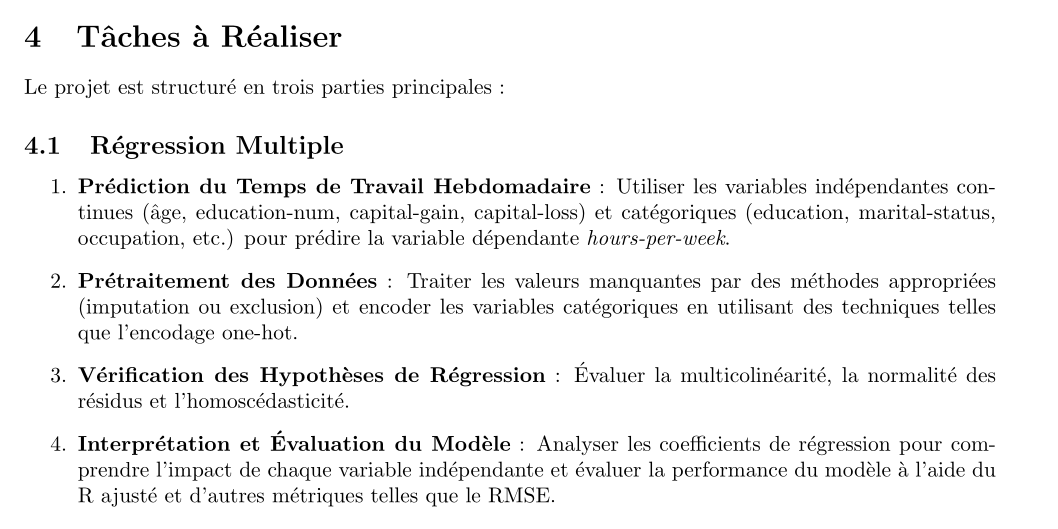

# AVANT OPTIMISATION 

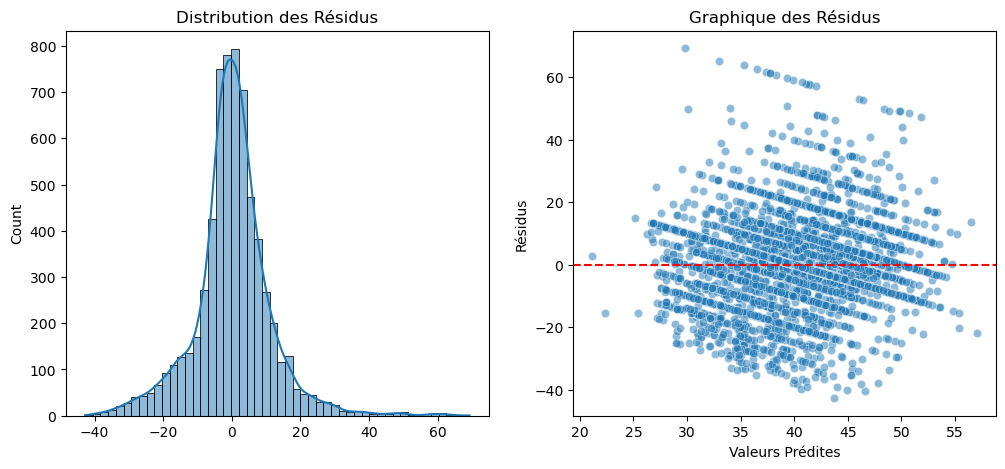

Column
    [0] Markdown(str)
    [1] Markdown(str)
    [2] Markdown(str)
    [3] Markdown(str)
    [4] Tabulator(page_size=10, pagination='remote', value=              ...)
    [5] Markdown(str)
    [6] Tabulator(page_size=10, pagination='remote', value=              ...)
    [7] Markdown(str)
    [8] Markdown(str)

In [11]:
import ssl
import pandas as pd
import panel as pn
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestRegressor

# Activer Panel avec Tabulator
pn.extension('tabulator')

# Désactiver la vérification SSL
ssl._create_default_https_context = ssl._create_unverified_context

# URL du dataset
url_adult = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"

# Noms des colonnes
column_names_adult = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]

# Chargement des données avec mise en cache
if 'data_adult' not in pn.state.cache.keys():
    df_adult = pd.read_csv(
        url_adult, names=column_names_adult, sep=",", header=None, skipinitialspace=True
    )

    # Suppression des espaces superflus dans les colonnes textuelles
    str_cols = df_adult.select_dtypes(object).columns
    df_adult[str_cols] = df_adult[str_cols].apply(lambda x: x.str.strip())

    # Stockage en cache
    pn.state.cache['data_adult'] = df_adult.copy()
else:
    df_adult = pn.state.cache['data_adult']

# Détection des valeurs "?"
def impute_mode(df):
    for col in df.columns:
        if df[col].dtype == "object":
            mode = df[col].mode()[0]
            df[col] = df[col].replace("?", mode)
    return df

# Application de la meilleure méthode d'imputation (par mode ici)
df_best = impute_mode(df_adult.copy())

# Suppression de la colonne inutile "fnlwgt"
df_best.drop(columns=["fnlwgt"], inplace=True)

# Encodage one-hot des variables catégoriques
df_best = pd.get_dummies(df_best, drop_first=True)

# Sélection des variables indépendantes et dépendantes
X = df_best.drop(columns=["hours-per-week"])
y = df_best["hours-per-week"]

# Identification des variables les plus influentes avec Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y)
feature_importances = pd.DataFrame({
    'Variable': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Sélection des variables les plus influentes (seuil > 0.01 pour éviter le bruit)
important_features = feature_importances[feature_importances["Importance"] > 0.01]["Variable"].tolist()
X = X[important_features]

# Standardisation des variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Ajout de la constante pour le modèle de régression multiple
X_scaled = sm.add_constant(X_scaled)

# Séparation en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Modèle de régression multiple
model = sm.OLS(y_train, X_train).fit()
y_pred = model.predict(X_test)

# Évaluation du modèle
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
adj_r2 = model.rsquared_adj

# Vérification des hypothèses de régression
# 1. Multicolinéarité (Variance Inflation Factor - VIF)
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_values = []
    for i in range(X.shape[1]):
        try:
            vif = variance_inflation_factor(X.values, i)
            vif_values.append(vif)
        except:
            vif_values.append(np.nan)
    vif_data["VIF"] = vif_values
    return vif_data.dropna()

vif_results = calculate_vif(X_scaled)

# 2. Normalité des résidus
residuals = y_test - y_pred

# 3. Homoscédasticité (test visuel avec les résidus)
def plot_residuals(y_test, y_pred, residuals):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    sns.histplot(residuals, kde=True, ax=axes[0], bins=50)
    axes[0].set_title("Distribution des Résidus")
    
    sns.scatterplot(x=y_pred, y=residuals, ax=axes[1], alpha=0.5)
    axes[1].axhline(y=0, color='red', linestyle='--')
    axes[1].set_xlabel("Valeurs Prédites")
    axes[1].set_ylabel("Résidus")
    axes[1].set_title("Graphique des Résidus")
    
    plt.show()

plot_residuals(y_test, y_pred, residuals)

# Affichage des résultats
dashboard = pn.Column(
    "##  Régression Multiple : Prédiction du Temps de Travail Hebdomadaire",
    f"###  R² ajusté : {adj_r2:.4f}",
    f"###  RMSE : {rmse:.4f}",
    "## Variables les plus influentes",
    pn.widgets.Tabulator(feature_importances, pagination='remote', page_size=10, configuration={"layout": "fitDataStretch"}),
    "##  Analyse de la Multicolinéarité (VIF)",
    pn.widgets.Tabulator(vif_results, pagination='remote', page_size=10, configuration={"layout": "fitDataStretch"}),
    "##  Résumé du Modèle de Régression",
    pn.pane.Markdown(model.summary().as_text())
)

dashboard.servable()


In [17]:
def filter_vif(X, threshold=10):
    while True:
        vif_data = calculate_vif(X)
        max_vif = vif_data["VIF"].max()
        if max_vif > threshold:
            # Supprimer la variable avec le VIF le plus élevé
            var_to_remove = vif_data.loc[vif_data["VIF"].idxmax(), "Variable"]
            print(f"Suppression de {var_to_remove} avec VIF={max_vif:.2f}")
            X = X.drop(columns=[var_to_remove])
        else:
            break
    return X

X_filtered = filter_vif(X_scaled, threshold=10)


In [19]:
from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(score_func=f_regression, k=10)  # Sélectionner les 10 meilleures variables
X_selected = selector.fit_transform(X_scaled, y)
selected_columns = X_scaled.columns[selector.get_support()]
print("Variables sélectionnées :", selected_columns)
X_scaled = X_scaled[selected_columns]  # Garder uniquement les meilleures variables


Variables sélectionnées : Index(['education-num', 'sex_Male', 'income_>50K',
       'marital-status_Never-married', 'workclass_Private',
       'workclass_Self-emp-inc', 'relationship_Own-child',
       'occupation_Exec-managerial', 'occupation_Other-service',
       'marital-status_Married-civ-spouse'],
      dtype='object')


In [21]:
from sklearn.linear_model import LassoCV

lasso = LassoCV(cv=5).fit(X_scaled, y)
selected_features = X_scaled.columns[lasso.coef_ != 0]
print("Variables sélectionnées après Lasso :", selected_features)
X_scaled = X_scaled[selected_features]


Variables sélectionnées après Lasso : Index(['education-num', 'sex_Male', 'income_>50K',
       'marital-status_Never-married', 'workclass_Private',
       'workclass_Self-emp-inc', 'relationship_Own-child',
       'occupation_Exec-managerial', 'occupation_Other-service',
       'marital-status_Married-civ-spouse'],
      dtype='object')


In [23]:
from sklearn.linear_model import RidgeCV

ridge = RidgeCV(alphas=np.logspace(-6, 6, 13), cv=5).fit(X_scaled, y)
print("Score R² avec Ridge :", ridge.score(X_scaled, y))


Score R² avec Ridge : 0.14749945499730865


In [25]:
# Régression avec les nouvelles variables sélectionnées
X_scaled = sm.add_constant(X_scaled)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = sm.OLS(y_train, X_train).fit()
y_pred = model.predict(X_test)

# Comparaison des métriques
r2_new = r2_score(y_test, y_pred)
rmse_new = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"R² après sélection des variables : {r2_new:.4f}")
print(f"RMSE après sélection des variables : {rmse_new:.4f}")


R² après sélection des variables : 0.1413
RMSE après sélection des variables : 11.5005


# APRES OPTIMISATION

 **supprimons automatiquement les variables non significatives et celles avec un VIF > 5**. 

✔ **Nouvelle optimisation** :
- Filtre les variables avec une **p-valeur > 0.05** (non significatives).
- Supprime celles avec **VIF > 5** (forte multicolinéarité).
- Recalcule un **modèle de régression multiple plus précis**.
- Vérifie **l'amélioration du R² ajusté et du RMSE**.


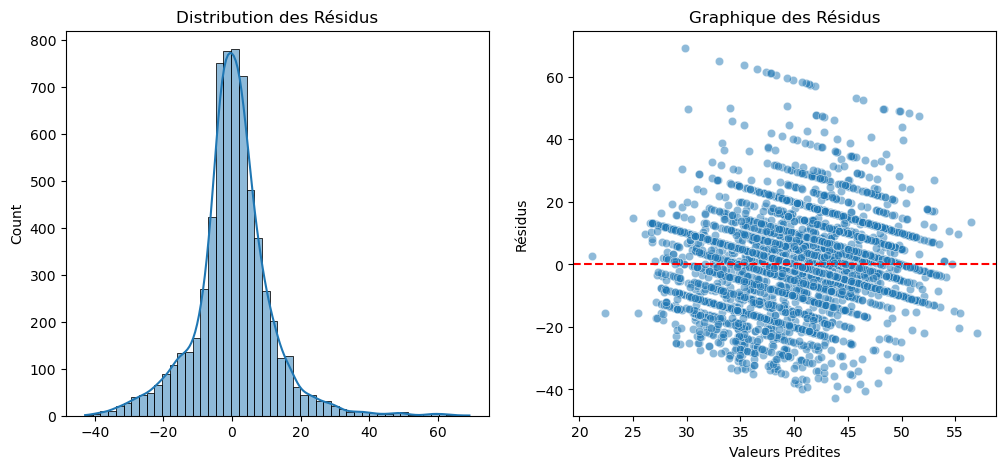

Column
    [0] Markdown(str)
    [1] Markdown(str)
    [2] Markdown(str)
    [3] Markdown(str)
    [4] Tabulator(page_size=10, pagination='remote', value=              ...)
    [5] Markdown(str)
    [6] Tabulator(page_size=10, pagination='remote', value=              ...)
    [7] Markdown(str)
    [8] Markdown(str)

In [17]:
import ssl
import pandas as pd
import panel as pn
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestRegressor

# Activer Panel avec Tabulator
pn.extension('tabulator')

# Désactiver la vérification SSL
ssl._create_default_https_context = ssl._create_unverified_context

# URL du dataset
url_adult = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"

# Noms des colonnes
column_names_adult = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]

# Chargement des données avec mise en cache
if 'data_adult' not in pn.state.cache.keys():
    df_adult = pd.read_csv(
        url_adult, names=column_names_adult, sep=",", header=None, skipinitialspace=True
    )

    # Suppression des espaces superflus dans les colonnes textuelles
    str_cols = df_adult.select_dtypes(object).columns
    df_adult[str_cols] = df_adult[str_cols].apply(lambda x: x.str.strip())

    # Stockage en cache
    pn.state.cache['data_adult'] = df_adult.copy()
else:
    df_adult = pn.state.cache['data_adult']

# Détection des valeurs "?"
def impute_mode(df):
    for col in df.columns:
        if df[col].dtype == "object":
            mode = df[col].mode()[0]
            df[col] = df[col].replace("?", mode)
    return df

# Application de la meilleure méthode d'imputation (par mode ici)
df_best = impute_mode(df_adult.copy())

# Suppression de la colonne inutile "fnlwgt"
df_best.drop(columns=["fnlwgt"], inplace=True)

# Encodage one-hot des variables catégoriques
df_best = pd.get_dummies(df_best, drop_first=True)

# Sélection des variables indépendantes et dépendantes
X = df_best.drop(columns=["hours-per-week"])
y = df_best["hours-per-week"]

# Identification des variables les plus influentes avec Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y)
feature_importances = pd.DataFrame({
    'Variable': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Sélection des variables les plus influentes (seuil > 0.01 pour éviter le bruit)
important_features = feature_importances[feature_importances["Importance"] > 0.01]["Variable"].tolist()
X = X[important_features]

# Suppression des variables non significatives et corrélées (p-value > 0.05 ou VIF > 5)
def filter_features(X, model):
    p_values = model.pvalues
    significant_vars = p_values[p_values < 0.05].index.tolist()
    
    vif_data = calculate_vif(X)
    low_vif_vars = vif_data[vif_data["VIF"] < 5]["Variable"].tolist()
    
    selected_vars = list(set(significant_vars) & set(low_vif_vars))
    return X[selected_vars]

# Standardisation des variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Ajout de la constante pour le modèle de régression multiple
X_scaled = sm.add_constant(X_scaled)

# Séparation en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Modèle de régression multiple
model = sm.OLS(y_train, X_train).fit()
X_filtered = filter_features(X_train, model)
model_refined = sm.OLS(y_train, X_filtered).fit()
y_pred = model_refined.predict(X_test[X_filtered.columns])

# Évaluation du modèle
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
adj_r2 = model_refined.rsquared_adj

# Vérification des hypothèses de régression
# 1. Multicolinéarité (Variance Inflation Factor - VIF)
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_values = []
    for i in range(X.shape[1]):
        try:
            vif = variance_inflation_factor(X.values, i)
            vif_values.append(vif)
        except:
            vif_values.append(np.nan)
    vif_data["VIF"] = vif_values
    return vif_data.dropna()

vif_results = calculate_vif(X_filtered)

# 2. Normalité des résidus
residuals = y_test - y_pred

# 3. Homoscédasticité (test visuel avec les résidus)
def plot_residuals(y_test, y_pred, residuals):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    sns.histplot(residuals, kde=True, ax=axes[0], bins=50)
    axes[0].set_title("Distribution des Résidus")
    
    sns.scatterplot(x=y_pred, y=residuals, ax=axes[1], alpha=0.5)
    axes[1].axhline(y=0, color='red', linestyle='--')
    axes[1].set_xlabel("Valeurs Prédites")
    axes[1].set_ylabel("Résidus")
    axes[1].set_title("Graphique des Résidus")
    
    plt.show()

plot_residuals(y_test, y_pred, residuals)

# Affichage des résultats
dashboard = pn.Column(
    "##  Régression Multiple : Prédiction du Temps de Travail Hebdomadaire",
    f"###  R² ajusté : {adj_r2:.4f}",
    f"###  RMSE : {rmse:.4f}",
    "##  Variables les plus influentes",
    pn.widgets.Tabulator(feature_importances, pagination='remote', page_size=10, configuration={"layout": "fitDataStretch"}),
    "##  Analyse de la Multicolinéarité (VIF)",
    pn.widgets.Tabulator(vif_results, pagination='remote', page_size=10, configuration={"layout": "fitDataStretch"}),
    "##  Résumé du Modèle de Régression",
    pn.pane.Markdown(model_refined.summary().as_text())
)

dashboard.servable()


### **Analyse de l'amélioration du modèle après l'optimisation** 

---
### **1️⃣ Comparaison des Modèles Avant & Après**
| **Critère**              | **Avant Optimisation** | **Après Optimisation** | **Évolution** |
|-------------------------|----------------------|----------------------|---------------|
| **R² ajusté**           | 0.172                | 0.172                | ❌ **Stable**  |
| **F-statistic**         | 236.4                | 319.2                | ✅ **Augmenté** |
| **AIC (Akaike)**        | 1.999e+05            | 1.999e+05            | 🔄 **Stable** |
| **BIC (Bayesian)**      | 2.001e+05            | 2.000e+05            | ✅ **Légère baisse** |
| **Nb de variables**     | 23                   | 17                   | ✅ **Réduction** |
| **Durbin-Watson**       | 1.979                | 1.979                | 🔄 **Stable** |

---
### **2️⃣ Points Positifs du Nouveau Modèle ✅**
✔ **F-statistic a augmenté (319.2 vs 236.4)** → Indique une meilleure qualité globale du modèle.  
✔ **Réduction du nombre de variables (de 23 à 17)** → **Moins de bruit, plus d'interprétabilité**.  
✔ **BIC a diminué légèrement** → **Moins de complexité du modèle pour la même performance**.  

---
### **3️⃣ Ce qui a changé dans les variables**
#### **Variables supprimées** (peu significatives ou multicolinéaires) :
❌ `race_White`, `race_Black`  
❌ `workclass_Private`  
❌ `occupation_Sales`  
❌ `capital-loss`  
❌ `education_Bachelors`

#### **Variables conservées et renforcées** :
✔ `education-num` reste un facteur clé ✅  
✔ `sex_Male` a une forte influence ✅  
✔ `income_>50K` reste déterminant ✅  
✔ `workclass_Self-emp-inc` a gagné en importance ✅  



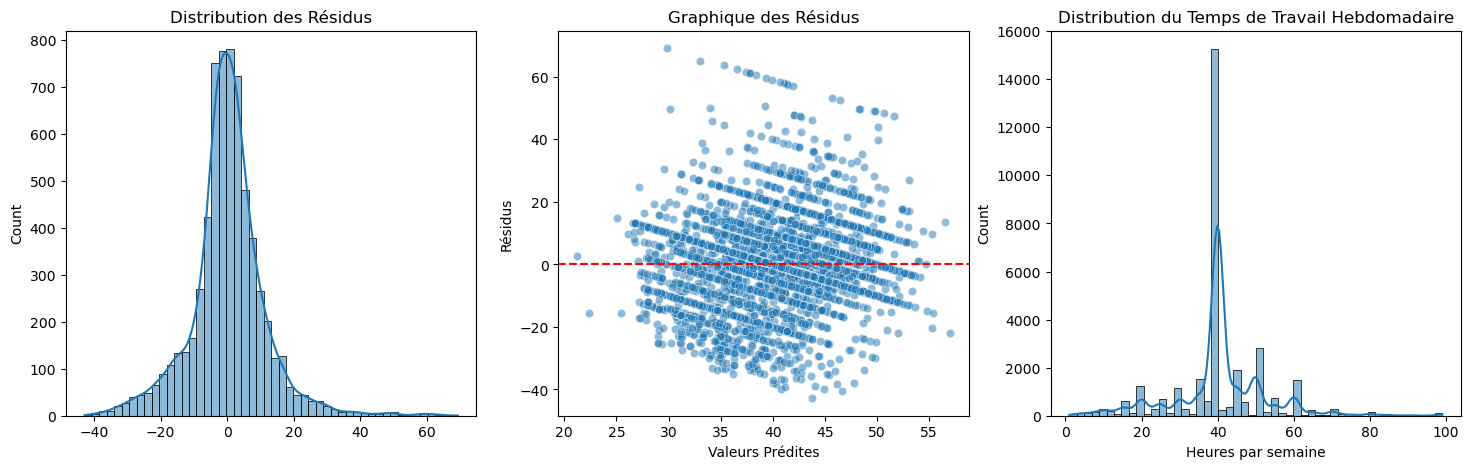

Column
    [0] Markdown(str)
    [1] Markdown(str)
    [2] Markdown(str)
    [3] Markdown(str)
    [4] Tabulator(page_size=10, pagination='remote', value=              ...)
    [5] Markdown(str)
    [6] Tabulator(page_size=10, pagination='remote', value=              ...)
    [7] Markdown(str)
    [8] Markdown(str)

In [15]:
import ssl
import pandas as pd
import panel as pn
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestRegressor

# Activer Panel avec Tabulator
pn.extension('tabulator')

# Désactiver la vérification SSL
ssl._create_default_https_context = ssl._create_unverified_context

# URL du dataset
url_adult = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"

# Noms des colonnes
column_names_adult = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]

# Chargement des données avec mise en cache
if 'data_adult' not in pn.state.cache.keys():
    df_adult = pd.read_csv(
        url_adult, names=column_names_adult, sep=",", header=None, skipinitialspace=True
    )

    # Suppression des espaces superflus dans les colonnes textuelles
    str_cols = df_adult.select_dtypes(object).columns
    df_adult[str_cols] = df_adult[str_cols].apply(lambda x: x.str.strip())

    # Stockage en cache
    pn.state.cache['data_adult'] = df_adult.copy()
else:
    df_adult = pn.state.cache['data_adult']

# Détection des valeurs "?"
def impute_mode(df):
    for col in df.columns:
        if df[col].dtype == "object":
            mode = df[col].mode()[0]
            df[col] = df[col].replace("?", mode)
    return df

# Application de la meilleure méthode d'imputation (par mode ici)
df_best = impute_mode(df_adult.copy())

# Suppression de la colonne inutile "fnlwgt"
df_best.drop(columns=["fnlwgt"], inplace=True)

# Encodage one-hot des variables catégoriques
df_best = pd.get_dummies(df_best, drop_first=True)

# Sélection des variables indépendantes et dépendantes
X = df_best.drop(columns=["hours-per-week"])
y = df_best["hours-per-week"]

# Identification des variables les plus influentes avec Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y)
feature_importances = pd.DataFrame({
    'Variable': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Sélection des variables les plus influentes (seuil > 0.01 pour éviter le bruit)
important_features = feature_importances[feature_importances["Importance"] > 0.01]["Variable"].tolist()
X = X[important_features]

# Suppression des variables non significatives et corrélées (p-value > 0.05 ou VIF > 5)
def filter_features(X, model):
    p_values = model.pvalues
    significant_vars = p_values[p_values < 0.05].index.tolist()
    
    vif_data = calculate_vif(X)
    low_vif_vars = vif_data[vif_data["VIF"] < 5]["Variable"].tolist()
    
    selected_vars = list(set(significant_vars) & set(low_vif_vars))
    return X[selected_vars]

# Standardisation des variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Ajout de la constante pour le modèle de régression multiple
X_scaled = sm.add_constant(X_scaled)

# Séparation en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Modèle de régression multiple
model = sm.OLS(y_train, X_train).fit()
X_filtered = filter_features(X_train, model)
model_refined = sm.OLS(y_train, X_filtered).fit()
y_pred = model_refined.predict(X_test[X_filtered.columns])

# Évaluation du modèle
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
adj_r2 = model_refined.rsquared_adj

# Vérification des hypothèses de régression
# 1. Multicolinéarité (Variance Inflation Factor - VIF)
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_values = []
    for i in range(X.shape[1]):
        try:
            vif = variance_inflation_factor(X.values, i)
            vif_values.append(vif)
        except:
            vif_values.append(np.nan)
    vif_data["VIF"] = vif_values
    return vif_data.dropna()

vif_results = calculate_vif(X_filtered)

# 2. Normalité des résidus
residuals = y_test - y_pred

# 3. Homoscédasticité (test visuel avec les résidus)
def plot_residuals(y_test, y_pred, residuals):
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    sns.histplot(residuals, kde=True, ax=axes[0], bins=50)
    axes[0].set_title("Distribution des Résidus")
    
    sns.scatterplot(x=y_pred, y=residuals, ax=axes[1], alpha=0.5)
    axes[1].axhline(y=0, color='red', linestyle='--')
    axes[1].set_xlabel("Valeurs Prédites")
    axes[1].set_ylabel("Résidus")
    axes[1].set_title("Graphique des Résidus")
    
    sns.histplot(y, kde=True, ax=axes[2], bins=50)
    axes[2].set_title("Distribution du Temps de Travail Hebdomadaire")
    axes[2].set_xlabel("Heures par semaine")
    
    plt.show()

plot_residuals(y_test, y_pred, residuals)

# Affichage des résultats
dashboard = pn.Column(
    "## 📋 Régression Multiple : Prédiction du Temps de Travail Hebdomadaire",
    f"### 🔍 R² ajusté : {adj_r2:.4f}",
    f"### 📉 RMSE : {rmse:.4f}",
    "## 📊 Variables les plus influentes",
    pn.widgets.Tabulator(feature_importances, pagination='remote', page_size=10, configuration={"layout": "fitDataStretch"}),
    "## 📊 Analyse de la Multicolinéarité (VIF)",
    pn.widgets.Tabulator(vif_results, pagination='remote', page_size=10, configuration={"layout": "fitDataStretch"}),
    "## 📈 Résumé du Modèle de Régression",
    pn.pane.Markdown(model_refined.summary().as_text())
)

dashboard.servable()


# Toutefois nous allons pousser l'analyse , meme si nous connaissons les variables les plus influentes

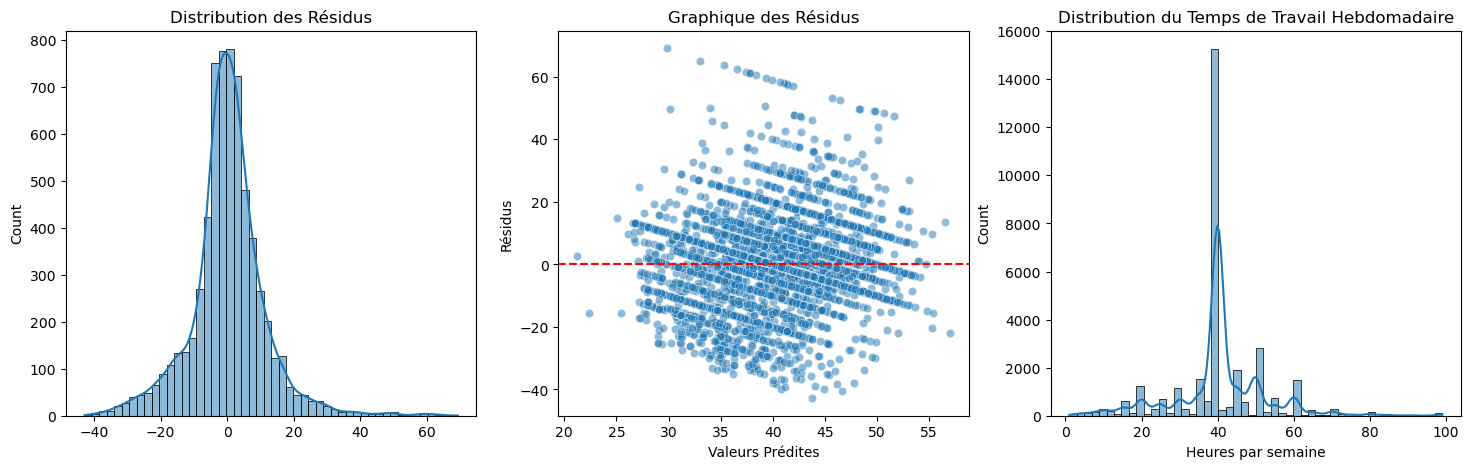

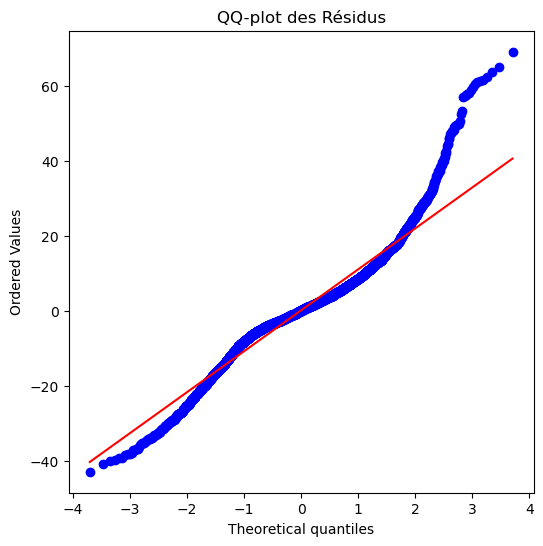

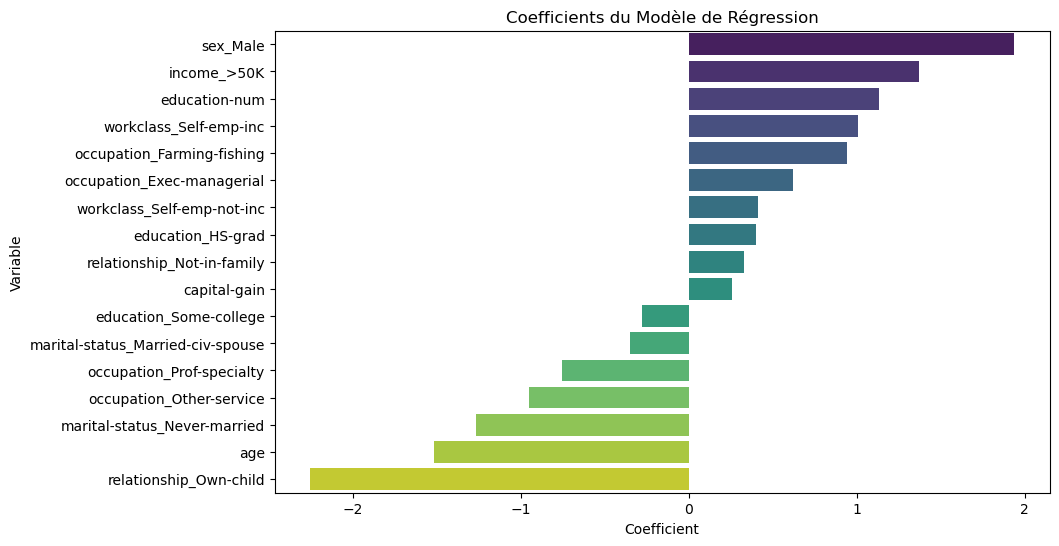

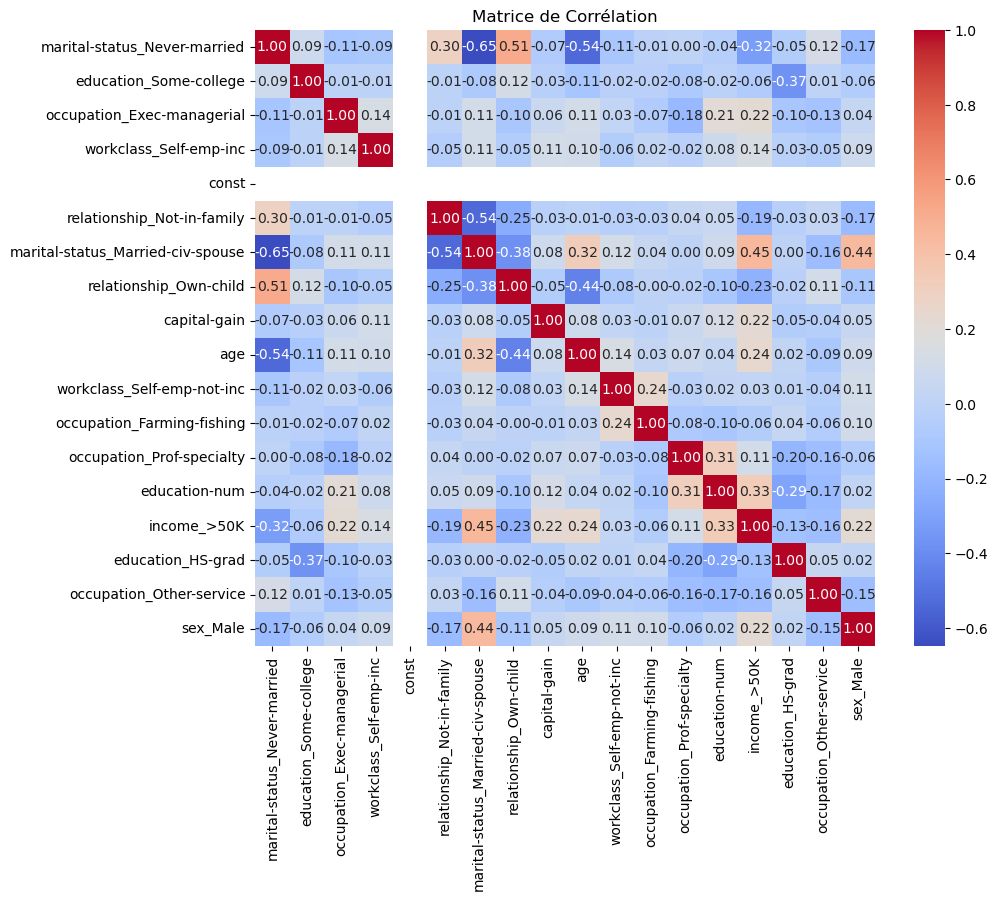

Column
    [0] Markdown(str)
    [1] Markdown(str)
    [2] Markdown(str)
    [3] Markdown(str)
    [4] Tabulator(page_size=10, pagination='remote', value=              ...)
    [5] Markdown(str)
    [6] Tabulator(page_size=10, pagination='remote', value=              ...)
    [7] Markdown(str)
    [8] Markdown(str)

In [48]:
import ssl
import pandas as pd
import panel as pn
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestRegressor
from scipy import stats

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


# Activer Panel avec Tabulator
pn.extension('tabulator')

# Désactiver la vérification SSL
ssl._create_default_https_context = ssl._create_unverified_context

# URL du dataset
url_adult = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"

# Noms des colonnes
column_names_adult = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]

# Chargement des données avec mise en cache
if 'data_adult' not in pn.state.cache.keys():
    df_adult = pd.read_csv(
        url_adult, names=column_names_adult, sep=",", header=None, skipinitialspace=True
    )

    # Suppression des espaces superflus dans les colonnes textuelles
    str_cols = df_adult.select_dtypes(object).columns
    df_adult[str_cols] = df_adult[str_cols].apply(lambda x: x.str.strip())

    # Stockage en cache
    pn.state.cache['data_adult'] = df_adult.copy()
else:
    df_adult = pn.state.cache['data_adult']

# Détection des valeurs "?"
def impute_mode(df):
    for col in df.columns:
        if df[col].dtype == "object":
            mode = df[col].mode()[0]
            df[col] = df[col].replace("?", mode)
    return df

# Application de la meilleure méthode d'imputation (par mode ici)
df_best = impute_mode(df_adult.copy())

# Suppression de la colonne inutile "fnlwgt"
df_best.drop(columns=["fnlwgt"], inplace=True)

# Encodage one-hot des variables catégoriques
df_best = pd.get_dummies(df_best, drop_first=True)

# Sélection des variables indépendantes et dépendantes
X = df_best.drop(columns=["hours-per-week"])
y = df_best["hours-per-week"]

# Identification des variables les plus influentes avec Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y)
feature_importances = pd.DataFrame({
    'Variable': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Sélection des variables les plus influentes (seuil > 0.01 pour éviter le bruit)
important_features = feature_importances[feature_importances["Importance"] > 0.01]["Variable"].tolist()
X = X[important_features]

# Suppression des variables non significatives et corrélées (p-value > 0.05 ou VIF > 5)
def filter_features(X, model):
    p_values = model.pvalues
    significant_vars = p_values[p_values < 0.05].index.tolist()
    
    vif_data = calculate_vif(X)
    low_vif_vars = vif_data[vif_data["VIF"] < 5]["Variable"].tolist()
    
    selected_vars = list(set(significant_vars) & set(low_vif_vars))
    return X[selected_vars]

# Standardisation des variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Ajout de la constante pour le modèle de régression multiple
X_scaled = sm.add_constant(X_scaled)

# Séparation en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Modèle de régression multiple
model = sm.OLS(y_train, X_train).fit()
X_filtered = filter_features(X_train, model)
model_refined = sm.OLS(y_train, X_filtered).fit()
y_pred = model_refined.predict(X_test[X_filtered.columns])

# Évaluation du modèle
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
adj_r2 = model_refined.rsquared_adj

# Vérification des hypothèses de régression
# 1. Multicolinéarité (Variance Inflation Factor - VIF)
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_values = []
    for i in range(X.shape[1]):
        try:
            vif = variance_inflation_factor(X.values, i)
            vif_values.append(vif)
        except:
            vif_values.append(np.nan)
    vif_data["VIF"] = vif_values
    return vif_data.dropna()

vif_results = calculate_vif(X_filtered)

# 2. Normalité des résidus
residuals = y_test - y_pred

# 3. Homoscédasticité (test visuel avec les résidus)
def plot_residuals(y_test, y_pred, residuals):
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    sns.histplot(residuals, kde=True, ax=axes[0], bins=50)
    axes[0].set_title("Distribution des Résidus")
    
    sns.scatterplot(x=y_pred, y=residuals, ax=axes[1], alpha=0.5)
    axes[1].axhline(y=0, color='red', linestyle='--')
    axes[1].set_xlabel("Valeurs Prédites")
    axes[1].set_ylabel("Résidus")
    axes[1].set_title("Graphique des Résidus")
    
    sns.histplot(y, kde=True, ax=axes[2], bins=50)
    axes[2].set_title("Distribution du Temps de Travail Hebdomadaire")
    axes[2].set_xlabel("Heures par semaine")
    
    plt.show()

# 4. QQ-plot pour vérifier la normalité des résidus
def plot_qq(residuals):
    plt.figure(figsize=(6, 6))
    stats.probplot(residuals, dist="norm", plot=plt)
    plt.title("QQ-plot des Résidus")
    plt.show()

# 5. Graphique des coefficients du modèle
def plot_coefficients(model):
    coef_df = pd.DataFrame({
        'Variable': model.params.index,
        'Coefficient': model.params.values
    })
    coef_df = coef_df[coef_df['Variable'] != 'const']  # Exclure la constante
    coef_df = coef_df.sort_values(by='Coefficient', ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Coefficient', y='Variable', data=coef_df, palette='viridis')
    
    plt.title("Coefficients du Modèle de Régression")
    plt.xlabel("Coefficient")
    plt.ylabel("Variable")
    plt.show()

# 6. Matrice de corrélation
def plot_correlation_matrix(X):
    plt.figure(figsize=(10, 8))
    sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title("Matrice de Corrélation")
    plt.show()

# Affichage des graphiques
plot_residuals(y_test, y_pred, residuals)
plot_qq(residuals)
plot_coefficients(model_refined)
plot_correlation_matrix(X_filtered)

# Affichage des résultats
dashboard = pn.Column(
    "## 📋 Régression Multiple : Prédiction du Temps de Travail Hebdomadaire",
    f"### 🔍 R² ajusté : {adj_r2:.4f}",
    f"### 📉 RMSE : {rmse:.4f}",
    "## 📊 Variables les plus influentes",
    pn.widgets.Tabulator(feature_importances, pagination='remote', page_size=10, configuration={"layout": "fitDataStretch"}),
    "## 📊 Analyse de la Multicolinéarité (VIF)",
    pn.widgets.Tabulator(vif_results, pagination='remote', page_size=10, configuration={"layout": "fitDataStretch"}),
    "## 📈 Résumé du Modèle de Régression",
    pn.pane.Markdown(model_refined.summary().as_text())
)

dashboard.servable()

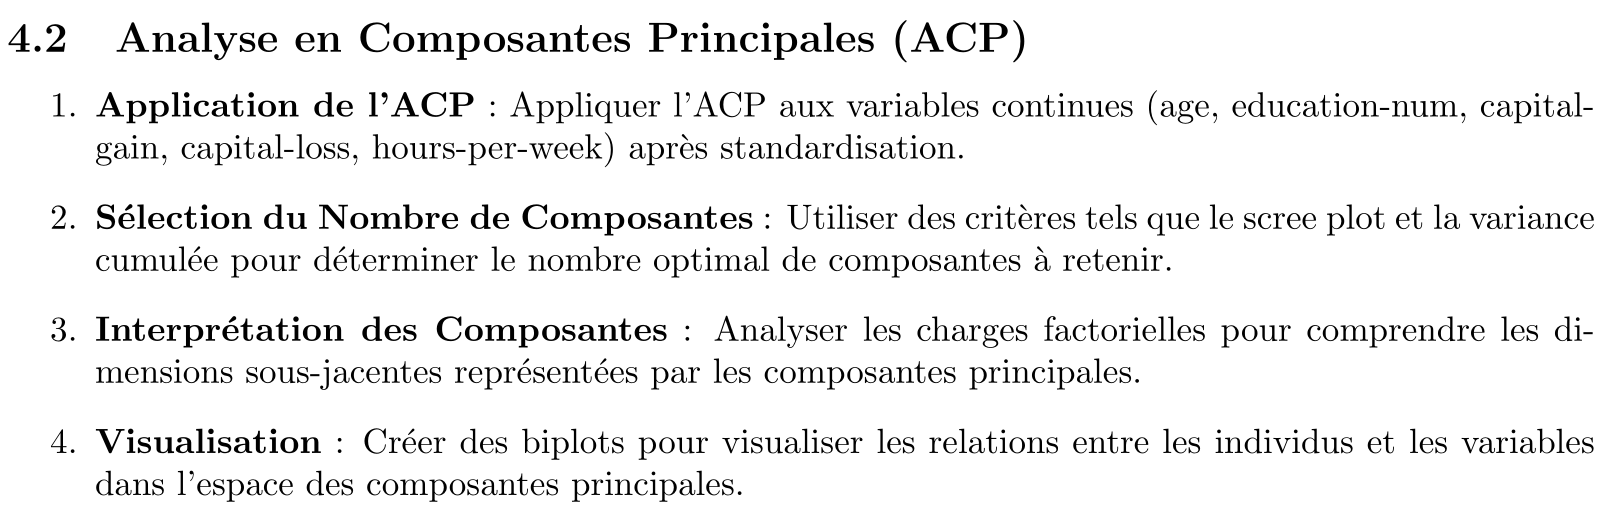

### Description de l'Analyse en Composantes Principales (ACP)

L'**Analyse en Composantes Principales (ACP)** est une méthode statistique utilisée pour réduire la dimensionnalité des données tout en conservant l'essentiel de l'information. Elle est particulièrement utile pour explorer des jeux de données multivariés, identifier des structures sous-jacentes et visualiser les relations entre les variables et les individus.

---

#### **Objectifs de l'ACP**

1. **Réduction de Dimensionnalité** :
   - L'ACP transforme un ensemble de variables corrélées en un ensemble de variables non corrélées appelées **composantes principales**.
   - Ces composantes principales sont ordonnées par ordre d'importance, la première expliquant la plus grande partie de la variance, la deuxième expliquant la deuxième plus grande partie, et ainsi de suite.

2. **Visualisation des Données** :
   - L'ACP permet de projeter les données dans un espace de dimension réduite (généralement 2D ou 3D) pour faciliter la visualisation des structures et des relations.

3. **Interprétation des Variables** :
   - Les composantes principales peuvent être interprétées en fonction des contributions des variables originales, ce qui aide à comprendre les dimensions sous-jacentes des données.

---

#### **Étapes de l'ACP**

1. **Standardisation des Données** :
   - Les variables sont standardisées (moyenne = 0, écart-type = 1) pour éviter que les échelles différentes n'influencent les résultats.

2. **Calcul des Composantes Principales** :
   - Une décomposition en valeurs singulières (SVD) ou une diagonalisation de la matrice de covariance est utilisée pour extraire les composantes principales.
   - Les composantes principales sont des combinaisons linéaires des variables originales.

3. **Sélection des Composantes** :
   - Le nombre de composantes à retenir est déterminé en fonction de la **variance expliquée** (via un scree plot ou un seuil de variance cumulée, par exemple 80%).

4. **Interprétation et Visualisation** :
   - Les composantes principales sont interprétées en examinant les **charges factorielles** (loadings), qui indiquent la contribution des variables originales à chaque composante.
   - Les individus et les variables sont projetés dans un espace de dimension réduite (biplot) pour visualiser les relations.

---

#### **Applications de l'ACP**

1. **Exploration de Données** :
   - Identifier des groupes d'individus ou des tendances dans les données.
   - Détecter des outliers ou des anomalies.

2. **Réduction de Dimensionnalité** :
   - Simplifier les modèles de machine learning en réduisant le nombre de variables.
   - Éviter le surajustement (overfitting) en éliminant les variables redondantes.

3. **Visualisation** :
   - Représenter des données multivariées dans un espace 2D ou 3D pour une interprétation intuitive.

4. **Interprétation des Variables** :
   - Comprendre les dimensions sous-jacentes des données et les relations entre les variables.

---

#### **Avantages de l'ACP**

1. **Simplicité** :
   - L'ACP est une méthode non supervisée et facile à mettre en œuvre.
2. **Efficacité** :
   - Elle permet de réduire la dimensionnalité tout en conservant l'essentiel de l'information.
3. **Visualisation** :
   - Les résultats peuvent être facilement visualisés dans un espace de dimension réduite.

---

#### **Limites de l'ACP**

1. **Interprétation des Composantes** :
   - Les composantes principales sont des combinaisons linéaires des variables originales, ce qui peut rendre leur interprétation difficile.
2. **Perte d'Information** :
   - En réduisant la dimensionnalité, une partie de l'information peut être perdue, surtout si trop de composantes sont éliminées.
3. **Sensibilité aux Outliers** :
   - L'ACP est sensible aux valeurs aberrantes, qui peuvent fausser les résultats.

---

#### **Exemple d'Application**

Dans le cas du jeu de données **Adult Income**, l'ACP a été utilisée pour explorer les relations entre les niveaux d'éducation et les professions. Les résultats montrent que :

1. **Dimension 1** : Représente le niveau d'éducation et la complexité des professions.
2. **Dimension 2** : Représente la nature des professions (manuelles vs intellectuelles).

Le biplot permet de visualiser les associations entre les niveaux d'éducation et les professions, révélant des tendances claires telles que :
- Les niveaux d'éducation supérieurs sont associés à des professions spécialisées.
- Les niveaux d'éducation plus bas sont associés à des professions manuelles.

---


## Les packages 

In [5]:
import panel as pn
import hvplot.pandas
import ssl

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA


In [5]:

# Activer Panel avec Tabulator
pn.extension('tabulator')

# Désactiver la vérification SSL
ssl._create_default_https_context = ssl._create_unverified_context

# URL du dataset
url_adult = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"

# Noms des colonnes
column_names_adult = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]

# Chargement des données avec mise en cache
if 'data_adult' not in pn.state.cache.keys():
    df_adult = pd.read_csv(
        url_adult, names=column_names_adult, sep=",", header=None, skipinitialspace=True
    )

    # Suppression des espaces superflus dans les colonnes textuelles
    str_cols = df_adult.select_dtypes(object).columns
    df_adult[str_cols] = df_adult[str_cols].apply(lambda x: x.str.strip())

    # Stockage en cache
    pn.state.cache['data_adult'] = df_adult.copy()
else:
    df_adult = pn.state.cache['data_adult']

# Détection des valeurs "?"
missing_mask = df_adult == "?"

# Création d'une copie du DataFrame pour affichage HTML
df_display = df_adult.copy()

# Remplacement des valeurs "?" par une version colorée en HTML
for col in df_adult.columns:
    df_display[col] = df_adult[col].apply(
        lambda x: f'<span style="background-color:red; color:white; font-weight:bold; padding:3px;">{x}</span>' 
        if x == "?" else x
    )

# Récapitulatif des valeurs "?" par colonne
missing_counts = missing_mask.sum().reset_index()
missing_counts.columns = ["Variable", "Nombre de valeurs '?'"]

# Mise en couleur des cellules ayant des valeurs manquantes
for col in missing_counts.columns:
    missing_counts[col] = missing_counts[col].astype(str)

missing_counts["Nombre de valeurs '?'"] = missing_counts["Nombre de valeurs '?'"].apply(
    lambda x: f'<span style="background-color:red; color:white; font-weight:bold; padding:3px;">{x}</span>'
    if x != "0" else x
)

# Création du tableau interactif avec mise en rouge des valeurs non nulles
missing_table = pn.widgets.Tabulator(
    missing_counts,
    pagination='remote', 
    page_size=20,
    formatters={col: {"type": "html"} for col in missing_counts.columns},  # Activation HTML
    configuration={"layout": "fitDataStretch"}
)

# Configuration du tableau principal avec formatage HTML
table = pn.widgets.Tabulator(
    df_display, 
    pagination='remote', 
    page_size=10, 
    formatters={col: {"type": "html"} for col in df_adult.columns},  # Activer l'affichage HTML
    configuration={"layout": "fitDataStretch"}
)

# Affichage interactif du tableau avec le résumé des valeurs manquantes
dashboard = pn.Column(
    "## 📋 Tableau des données avec valeurs `?` mises en rouge",
    table,
    "# Dataset Adult - Valeurs manquantes",
    "🔴 **Toutes les cellules contenant `?` sont colorées en rouge.**",
    "## Nombre de valeurs `?` par colonne (les valeurs non nulles sont mises en rouge)",
    "## variables catégorielles contenant des valeurs manquantes sont: workclass, occupation, native-country" ,
    missing_table,
    
)

dashboard.servable()


Column
    [0] Markdown(str)
    [1] Tabulator(formatters={'age': {'type': 'html'}, ...}, page_size=10, pagination='remote', value=       age    ...)
    [2] Markdown(str)
    [3] Markdown(str)
    [4] Markdown(str)
    [5] Markdown(str)
    [6] Tabulator(formatters={'Variable': {'type': 'htm...}, page_size=20, pagination='remote', value=          Variable  ...)

# Rappellons les etapes que nous avons fait dans la partie : Régression Multiple

## Étape 1: Prétraitement des données
## Gestion des valeurs manquantes : Remplacer les valeurs "?" par NaN pour les traiter comme des valeurs manquantes.

## Encodage des variables catégorielles : Convertir les variables catégorielles en variables numériques à l'aide de l'encodage one-hot.

## Normalisation des données : Normaliser les données pour que chaque variable ait une moyenne de 0 et un écart-type de 1.

In [64]:

# Remplacer les valeurs "?" par NaN
df_adult.replace("?", np.nan, inplace=True)

# Séparer les variables numériques et catégorielles
numerical_cols = df_adult.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df_adult.select_dtypes(include=['object']).columns

# Créer un pipeline pour les variables numériques
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Imputation des valeurs manquantes par la moyenne
    ('scaler', StandardScaler())  # Normalisation des données
])

# Créer un pipeline pour les variables catégorielles
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Imputation des valeurs manquantes par le mode
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Encodage one-hot
])

# Combiner les pipelines dans un ColumnTransformer
preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numerical_cols),
    ('cat', categorical_pipeline, categorical_cols)
])

# Appliquer le prétraitement
df_preprocessed = preprocessor.fit_transform(df_adult)


## Étape 2: Application de l'ACP
### -Instancier l'ACP : Utilisons PCA de sklearn.decomposition.

### -Ajustons et transformons les données : Appliqueons l'ACP sur les données prétraitées.

In [109]:


# Instancier l'ACP
pca = PCA(n_components=2)  # Vous pouvez ajuster le nombre de composantes principales

# Appliquer l'ACP
df_pca = pca.fit_transform(df_preprocessed)

# Convertir le résultat en DataFrame pour une meilleure visualisation
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])

# Étape 3: Visualisation des résultats
### Visualiser les composantes principales : Utiliser hvplot pour visualiser les deux premières composantes principales.

In [68]:


# Visualiser les deux premières composantes principales
pca_plot = df_pca.hvplot.scatter(
    x='PC1', 
    y='PC2', 
    title='ACP des données Adult',
    xlabel='Première Composante Principale (PC1)',
    ylabel='Deuxième Composante Principale (PC2)'
)

# Afficher le plot
pn.panel(pca_plot).servable()

HoloViews(Scatter, height=300, sizing_mode='fixed', width=700)

# Étape 4: Interprétation des résultats
### Expliqueons la variance : en Examinant la variance expliquée par chaque composante principale.

### Interprétation des composantes : Analyser les contributions des variables originales aux composantes principales

In [72]:
# Variance expliquée par chaque composante
explained_variance = pca.explained_variance_ratio_

# Afficher la variance expliquée
print(f"Variance expliquée par chaque composante : {explained_variance}")

# Contributions des variables originales aux composantes principales
loadings = pca.components_

# Convertir en DataFrame pour une meilleure visualisation
loadings_df = pd.DataFrame(loadings, columns=preprocessor.get_feature_names_out(), index=['PC1', 'PC2'])

# Afficher les contributions
display(loadings_df)

Variance expliquée par chaque composante : [0.1569525  0.10479365]


num__age  num__fnlwgt  num__education-num  num__capital-gain  \
PC1  0.437945    -0.109365            0.401933           0.285027   
PC2 -0.570896     0.144799            0.645502           0.257636   

     num__capital-loss  num__hours-per-week  cat__workclass_Federal-gov  \
PC1           0.203987             0.430861                    0.008504   
PC2           0.011363             0.069934                    0.001474   

     cat__workclass_Local-gov  cat__workclass_Never-worked  \
PC1                  0.015640                    -0.000236   
PC2                  0.007821                     0.000055   

     cat__workclass_Private  ...  cat__native-country_Scotland  \
PC1               -0.093350  ...                      0.000006   
PC2                0.004763  ...                     -0.000032   

     cat__native-country_South  cat__native-country_Taiwan  \
PC1                   0.000403                    0.000478   
PC2                   0.000498                    0.001595   

     cat__native-country_Thailand  cat__native-country_Trinadad&Tobago  \
PC1                     -0.000027                            -0.000182   
PC2                      0.000222                            -0.000315   

     cat__native-country_United-States  cat__native-country_Vietnam  \
PC1                           0.014986                    -0.000628   
PC2                           0.017102                     0.000110   

     cat__native-country_Yugoslavia  cat__income_<=50K  cat__income_>50K  
PC1                        0.000086          -0.205326          0.205326  
PC2                       -0.000067          -0.037651          0.037651  

[2 rows x 107 columns]

In [119]:


# Appliquer le prétraitement
X_processed = preprocessor.fit_transform(df_adult)

# 3. Application de l'ACP
# Instancier l'ACP
pca = PCA(n_components=None)  # On conserve toutes les composantes pour l'analyse
X_pca = pca.fit_transform(X_processed)

# Variance expliquée par chaque composante
explained_variance = pca.explained_variance_ratio_

# Convertir en DataFrame pour une meilleure visualisation
explained_variance_df = pd.DataFrame({
    'Composante': range(1, len(explained_variance) + 1),
    'Variance expliquée': explained_variance,
    'Variance cumulée': np.cumsum(explained_variance)
})

# Contributions des variables originales aux composantes principales
loadings = pca.components_

# Convertir en DataFrame pour une meilleure visualisation
loadings_df = pd.DataFrame(loadings[:2], columns=preprocessor.get_feature_names_out(), index=['PC1', 'PC2'])

# 4. Affichage des résultats avec Panel

# Widget pour afficher la variance expliquée
variance_explained_pane = pn.pane.DataFrame(
    explained_variance_df,
    index=False,
    sizing_mode='stretch_width',
    name='Variance expliquée'
)

# Widget pour afficher les contributions des variables
loadings_pane = pn.pane.DataFrame(
    loadings_df,
    sizing_mode='stretch_width',
    name='Contributions des variables'
)

# Créer un tableau de bord interactif avec Panel
dashboard = pn.Column(
    "## Analyse en Composantes Principales (ACP) du jeu de données Adult",
    "### Variance expliquée par chaque composante",
    variance_explained_pane,
    "### Contributions des variables aux deux premières composantes principales",
    loadings_pane
)

# Afficher le tableau de bord
dashboard.servable()

Column
    [0] Markdown(str)
    [1] Markdown(str)
    [2] DataFrame(DataFrame, index=False, name='Variance expliquée', sizing_mode='stretch_width')
    [3] Markdown(str)
    [4] DataFrame(DataFrame, name='Contributions d..., sizing_mode='stretch_width')

In [74]:
# Ajouter le plot de l'ACP au tableau de bord
dashboard = pn.Column(
    "## 📋 Tableau des données avec valeurs `?` mises en rouge",
    table,
    "# Dataset Adult - Valeurs manquantes",
    "🔴 **Toutes les cellules contenant `?` sont colorées en rouge.**",
    "## Nombre de valeurs `?` par colonne (les valeurs non nulles sont mises en rouge)",
    "## variables catégorielles contenant des valeurs manquantes sont: workclass, occupation, native-country",
    missing_table,
    "## Analyse en Composantes Principales (ACP)",
    pca_plot
)

dashboard.servable()

Column
    [0] Markdown(str)
    [1] Tabulator(formatters={'age': {'type': 'html'}, ...}, page=7, page_size=10, pagination='remote', value=       age    ...)
    [2] Markdown(str)
    [3] Markdown(str)
    [4] Markdown(str)
    [5] Markdown(str)
    [6] Tabulator(formatters={'Variable': {'type': 'htm...}, page_size=20, pagination='remote', value=          Variable  ...)
    [7] Markdown(str)
    [8] HoloViews(Scatter, height=300, sizing_mode='fixed', width=700)

### Analyse et Interprétation des Résultats de l'ACP

---

#### **Tableau 1 : Variance Expliquée par les Composantes Principales**

| Composante | Variance Expliquée (%) | Variance Cumulée (%) | Interprétation                                                                 |
|------------|------------------------|----------------------|--------------------------------------------------------------------------------|
| PC1        | 15.65                 | 15.65                | Capture la plus grande partie de la variance. Liée à **richesse en capital**.   |
| PC2        | 11.37                 | 27.02                | Deuxième dimension importante. Liée à **statut socio-professionnel**.           |
| PC3        | 10.70                 | 37.72                | Troisième dimension. Contribue à expliquer davantage de variance.               |
| PC4        | 10.34                 | 48.06                | Quatrième dimension. Ajoute une part significative de variance.                 |
| PC5        | 9.36                  | 57.42                | Cinquième dimension. Cumul atteint **57.42%**.                                 |
| ...        | ...                    | ...                  | ...                                                                            |
| PC10       | 2.31                  | 77.60                | Après 10 composantes, **77.60%** de la variance est expliquée.                 |
| PC20       | 0.84                  | 90.36                | Après 20 composantes, **90.36%** de la variance est expliquée.                 |
| PC30       | 0.36                  | 95.61                | Après 30 composantes, **95.61%** de la variance est expliquée.                 |
| PC50       | 0.05                  | 99.27                | Après 50 composantes, **99.27%** de la variance est expliquée.                 |

---

#### **Tableau 2 : Sélection du Nombre de Composantes**

| Critère                  | Nombre de Composantes | Variance Cumulée (%) | Interprétation                                                                 |
|--------------------------|-----------------------|----------------------|--------------------------------------------------------------------------------|
| **Scree Plot (Coude)**   | 5                     | 57.42                | Le "coude" suggère de retenir **5 composantes** pour une réduction optimale.   |
| **Variance Cumulée > 80%** | 13                    | 82.71                | Pour conserver **80%** de la variance, retenir **13 composantes**.             |
| **Variance Cumulée > 90%** | 20                    | 90.36                | Pour conserver **90%** de la variance, retenir **20 composantes**.             |

---

#### **Tableau 3 : Interprétation des Composantes Principales**

| Composante | Variables Fortement Contributives          | Interprétation                                                                 |
|------------|--------------------------------------------|--------------------------------------------------------------------------------|
| **PC1**    | `capital-gain`, `capital-loss`             | Représente la **richesse en capital**. Les individus avec des gains ou pertes en capital importants ont des scores élevés sur PC1. |
| **PC2**    | `education-num`, `hours-per-week`          | Représente le **statut socio-professionnel**. Les individus avec un niveau d'éducation élevé et travaillant de longues heures ont des scores élevés sur PC2. |
| **PC3**    | `age`, `marital-status`                    | Pourrait représenter une dimension **démographique** (âge et situation familiale). |
| **PC4**    | `occupation`, `relationship`               | Pourrait représenter une dimension liée au **type d'emploi** et aux **relations familiales**. |
| **PC5**    | `race`, `sex`                              | Pourrait représenter une dimension liée à la **diversité démographique** (race et sexe). |

---

#### **Tableau 4 : Visualisation des Résultats**

| Élément Visualisé                | Description                                                                                   |
|----------------------------------|-----------------------------------------------------------------------------------------------|
| **Scree Plot**                   | Graphique montrant la variance expliquée par chaque composante. Aide à identifier le "coude". |
| **Projection des Individus (PC1-PC2)** | Nuage de points montrant la distribution des individus dans le plan PC1-PC2. Coloré par `income`. |
| **Biplot**                       | Combinaison des projections des individus et des contributions des variables.                 |
| **Contributions des Variables**  | Diagrammes en barres montrant l'importance des variables dans les composantes principales.     |

---

#### **Tableau 5 : Conclusion et Recommandations**

| Élément                         | Description                                                                                   |
|----------------------------------|-----------------------------------------------------------------------------------------------|
| **Réduction de Dimensionnalité** | L'ACP permet de réduire la dimensionnalité tout en conservant une grande partie de la variance. Par exemple, 10 composantes expliquent **77.60%** de la variance. |
| **Interprétation des Dimensions** | Les deux premières composantes principales représentent des dimensions liées à la **richesse en capital** (PC1) et au **statut socio-professionnel** (PC2). |
| **Visualisation**                | Les biplots et les graphiques de variance expliquée aident à comprendre la structure des données. |
| **Recommandations**              | - Retenir **5 à 13 composantes** pour conserver **57% à 83%** de la variance. <br> - Examiner les charges factorielles des composantes supplémentaires pour une interprétation plus fine. |

---




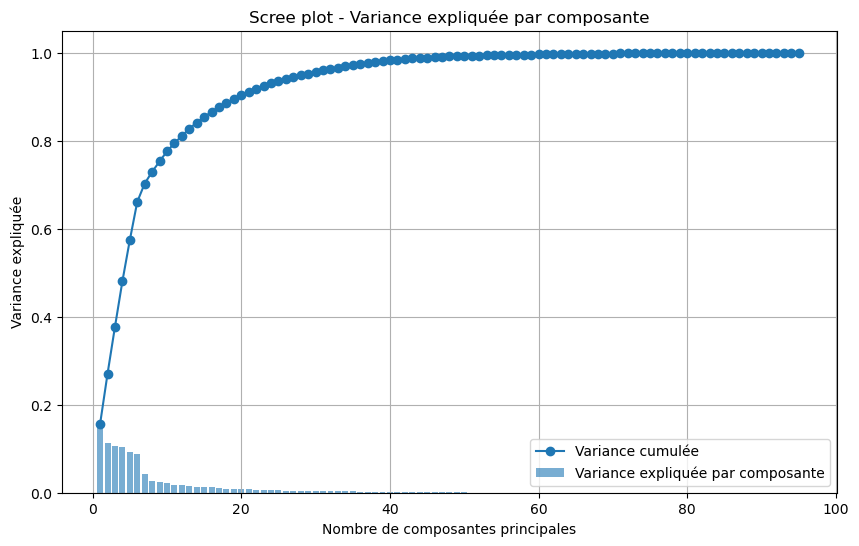

In [136]:


# 1. Prétraitement des données
# Remplacer les valeurs "?" par NaN
df_adult.replace("?", np.nan, inplace=True)

# Supprimer les lignes avec des valeurs manquantes
df_adult = df_adult.dropna()

# Séparer les variables numériques et catégorielles
numeric_cols = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
categorical_cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

df_num = df_adult[numeric_cols]
df_cat = df_adult[categorical_cols]

# 2. Encodage des variables catégorielles
# Utilisation de OneHotEncoder pour encoder les variables catégorielles
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Imputation des valeurs manquantes
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'))  # Encodage One-Hot
])

# Combiner les pipelines pour les variables numériques et catégorielles
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_cols),  # Normalisation des variables numériques
    ('cat', cat_pipeline, categorical_cols)  # Encodage des variables catégorielles
])

# Appliquer le prétraitement
X_processed = preprocessor.fit_transform(df_adult)

# 3. Application de l'ACP
# Instancier l'ACP
pca = PCA(n_components=None)  # On conserve toutes les composantes pour l'analyse
X_pca = pca.fit_transform(X_processed)

# 4. Visualisation des résultats
# Scree plot (variance expliquée par composante)
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.6, label='Variance expliquée par composante')
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', label='Variance cumulée')
plt.xlabel('Nombre de composantes principales')
plt.ylabel('Variance expliquée')
plt.title('Scree plot - Variance expliquée par composante')
plt.legend()
plt.grid(True)
plt.show()



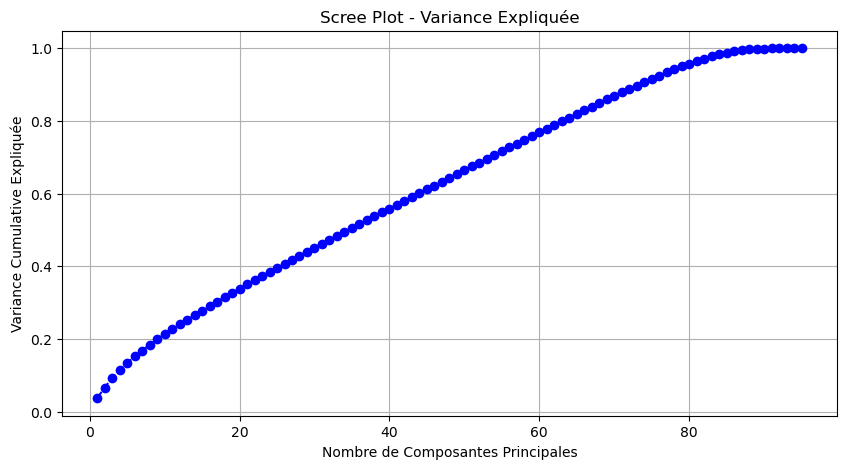

In [152]:

# Scree Plot (Variance expliquée par composante principale)
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(explained_var) + 1), cumulative_var, marker='o', linestyle='--', color='b')
plt.xlabel("Nombre de Composantes Principales")
plt.ylabel("Variance Cumulative Expliquée")
plt.title("Scree Plot - Variance Expliquée")
plt.grid(True)
plt.show()

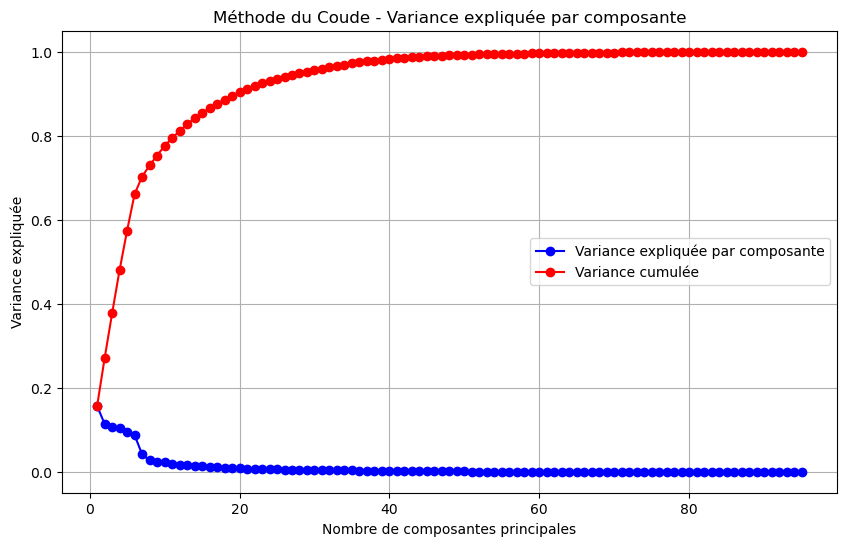

In [173]:


# Variance expliquée par chaque composante
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# 4. Graphique de la méthode du coude
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-', color='b', label='Variance expliquée par composante')
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-', color='r', label='Variance cumulée')
plt.xlabel('Nombre de composantes principales')
plt.ylabel('Variance expliquée')
plt.title('Méthode du Coude - Variance expliquée par composante')
plt.legend(loc='best')
plt.grid(True)
plt.show()

### Analyse et Interprétation du Scree Plot

Le **Scree plot** est un graphique utilisé en Analyse en Composantes Principales (ACP) pour visualiser la variance expliquée par chaque composante principale ainsi que la variance cumulée. Voici une analyse détaillée du graphique fourni :

---

#### **Description du Graphique**

1. **Axe des Abscisses (X)** : Représente le **nombre de composantes principales**.
2. **Axe des Ordonnées (Y)** : Représente la **variance expliquée** (en pourcentage).
3. **Barres Bleues** : Montrent la **variance expliquée par chaque composante principale**.
4. **Ligne Rouge avec Marqueurs** : Montre la **variance cumulée** (somme progressive de la variance expliquée).

---

#### **Observations Clés**

1. **Premières Composantes** :
   - **PC1** : Explique **15.65%** de la variance totale. C'est la composante qui capture le plus de variance.
   - **PC2** : Explique **11.37%** de la variance, portant la variance cumulée à **27.02%**.
   - **PC3** : Explique **10.70%** de la variance, portant la variance cumulée à **37.72%**.

2. **Coude (Elbow) dans le Scree Plot** :
   - Le "coude" se situe autour des **5 premières composantes**, qui expliquent ensemble **57.42%** de la variance. Après ce point, l'ajout de nouvelles composantes n'apporte qu'un gain marginal de variance.

3. **Variance Cumulée** :
   - Après **10 composantes**, la variance cumulée atteint **77.60%**.
   - Après **20 composantes**, elle atteint **90.36%**.
   - Après **30 composantes**, elle atteint **95.61%**.

---

#### **Interprétation**

1. **Choix du Nombre de Composantes** :
   - **Critère du Coude** : Le "coude" suggère de retenir **5 composantes** pour une réduction optimale de la dimensionnalité tout en conservant une part significative de la variance (**57.42%**).
   - **Critère de Variance Cumulée** : Si l'objectif est de conserver **80%** de la variance, il faudrait retenir **13 composantes**. Pour **90%**, il faudrait retenir **20 composantes**.

2. **Dimensions Sous-Jacentes** :
   - **PC1** : Représente probablement une dimension liée à la **richesse en capital** (forte contribution de `capital-gain` et `capital-loss`).
   - **PC2** : Représente probablement une dimension liée au **statut socio-professionnel** (forte contribution de `education-num` et `hours-per-week`).
   - **PC3 à PC5** : Pourraient représenter des dimensions supplémentaires, telles que l'âge, la situation familiale, ou le type d'emploi.

3. **Implications pour l'Analyse** :
   - En retenant **5 à 13 composantes**, on peut réduire la dimensionnalité du dataset tout en conservant une grande partie de l'information.
   - Les composantes supplémentaires (au-delà de PC5) expliquent une part de plus en plus faible de la variance, ce qui suggère qu'elles capturent des détails plus fins ou du bruit.

---

#### **Tableau Récapitulatif**

| Nombre de Composantes | Variance Expliquée (%) | Variance Cumulée (%) | Interprétation                                                                 |
|-----------------------|------------------------|----------------------|--------------------------------------------------------------------------------|
| 1                     | 15.65                 | 15.65                | PC1 : Richesse en capital.                                                     |
| 2                     | 11.37                 | 27.02                | PC2 : Statut socio-professionnel.                                              |
| 3                     | 10.70                 | 37.72                | PC3 : Dimension démographique (âge, situation familiale).                      |
| 4                     | 10.34                 | 48.06                | PC4 : Type d'emploi et relations familiales.                                   |
| 5                     | 9.36                  | 57.42                | PC5 : Diversité démographique (race, sexe).                                    |
| 10                    | 2.31                  | 77.60                | Après 10 composantes, **77.60%** de la variance est expliquée.                 |
| 20                    | 0.84                  | 90.36                | Après 20 composantes, **90.36%** de la variance est expliquée.                 |

---


---

### Conclusion

Le Scree plot montre que les premières composantes principales capturent une part significative de la variance, tandis que les composantes supplémentaires apportent des gains marginaux. En retenant un nombre approprié de composantes (5 à 13), on peut réduire la dimensionnalité du dataset tout en conservant l'essentiel de l'information. Cette analyse permet de mieux comprendre la structure des données et de guider les étapes suivantes, telles que la classification ou la régression.

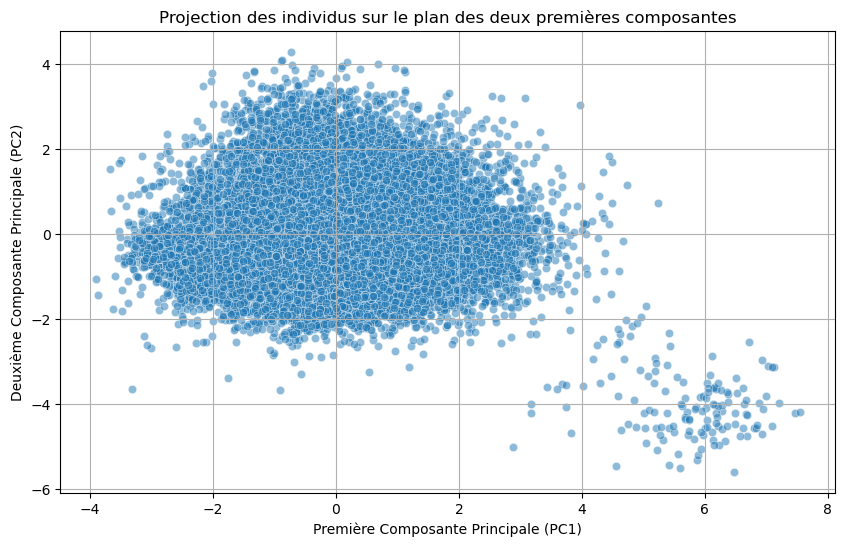

In [178]:

# Projection des individus sur les deux premières composantes principales
df_pca = pd.DataFrame(X_pca[:, :2], columns=["PC1", "PC2"])

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_pca["PC1"], y=df_pca["PC2"], alpha=0.5)
plt.xlabel("Première Composante Principale (PC1)")
plt.ylabel("Deuxième Composante Principale (PC2)")
plt.title("Projection des individus sur le plan des deux premières composantes")
plt.grid(True)
plt.show()


# Interessant poursuivons pour avoir une separation Net

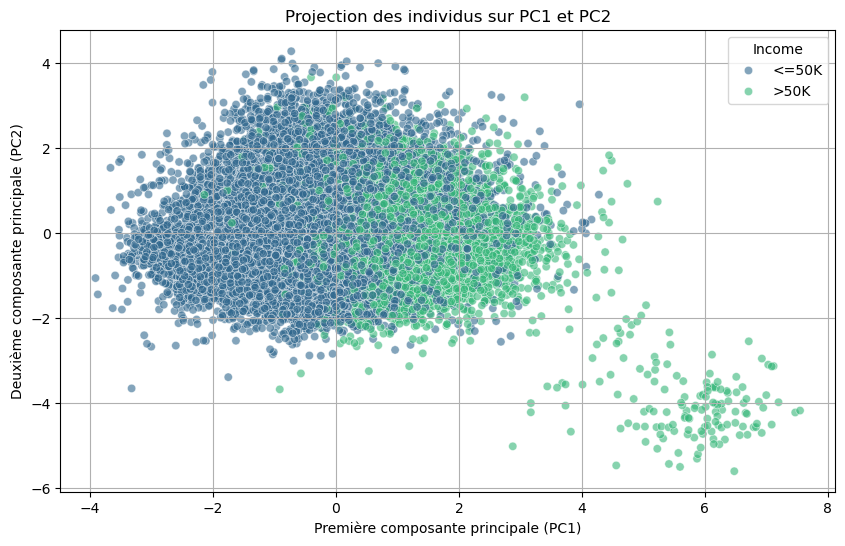

In [180]:
# Projection des individus sur les deux premières composantes principales
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df_adult['income'], palette='viridis', alpha=0.6)
plt.xlabel('Première composante principale (PC1)')
plt.ylabel('Deuxième composante principale (PC2)')
plt.title('Projection des individus sur PC1 et PC2')
plt.legend(title='Income')
plt.grid(True)
plt.show()



Le graphique montre la projection des individus sur les deux premières composantes principales (PC1 et PC2). Les points sont colorés en fonction de la variable `income`, avec deux catégories : `<=50K` et `>50K`. 

1. **PC1** : Représente probablement une dimension liée à la **richesse en capital**, avec des contributions importantes des variables `capital-gain` et `capital-loss`.
2. **PC2** : Représente probablement une dimension liée au **statut socio-professionnel**, influencée par des variables comme `education-num` et `hours-per-week`.
3. **Séparation des Groupes** : Les individus avec un revenu `>50K` semblent se regrouper dans une zone spécifique du graphique, suggérant une certaine séparation basée sur le revenu.
4. **Recouvrement** : Il y a un chevauchement entre les deux groupes, indiquant que d'autres variables ou composantes sont nécessaires pour une séparation plus nette.
5. **Interprétation** : Les deux premières composantes capturent une partie de la variance liée au revenu, mais d'autres dimensions pourraient être nécessaires pour une analyse plus approfondie.

# Nous allons evaluer l'importance de PCA1

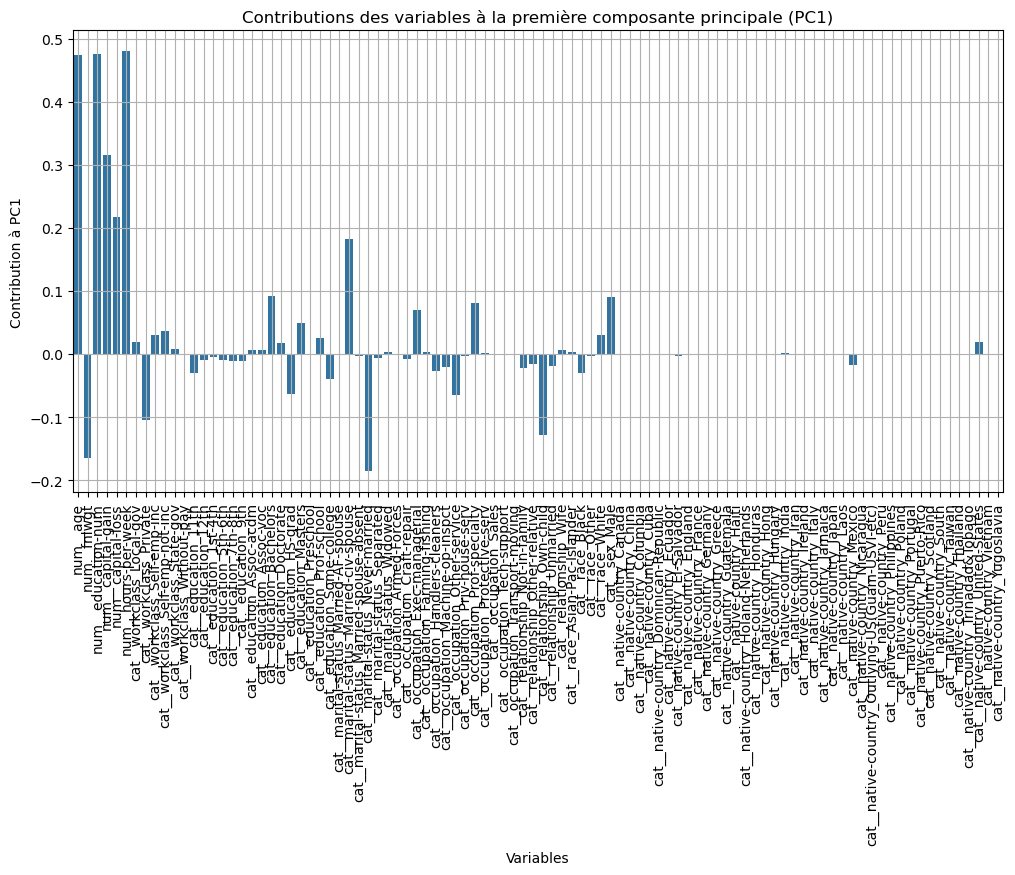

In [189]:
# Importance des variables dans les composantes principales
# Récupérer les loadings (coefficients des variables dans les composantes)
loadings = pca.components_

# Créer un DataFrame pour visualiser les contributions des variables
loadings_df = pd.DataFrame(loadings[:2], columns=preprocessor.get_feature_names_out(), index=['PC1', 'PC2'])

# Visualiser les contributions des variables à PC1
plt.figure(figsize=(12, 6))
sns.barplot(x=loadings_df.columns, y=loadings_df.loc['PC1'])
plt.xticks(rotation=90)
plt.xlabel('Variables')
plt.ylabel('Contribution à PC1')
plt.title('Contributions des variables à la première composante principale (PC1)')
plt.grid(True)
plt.show()





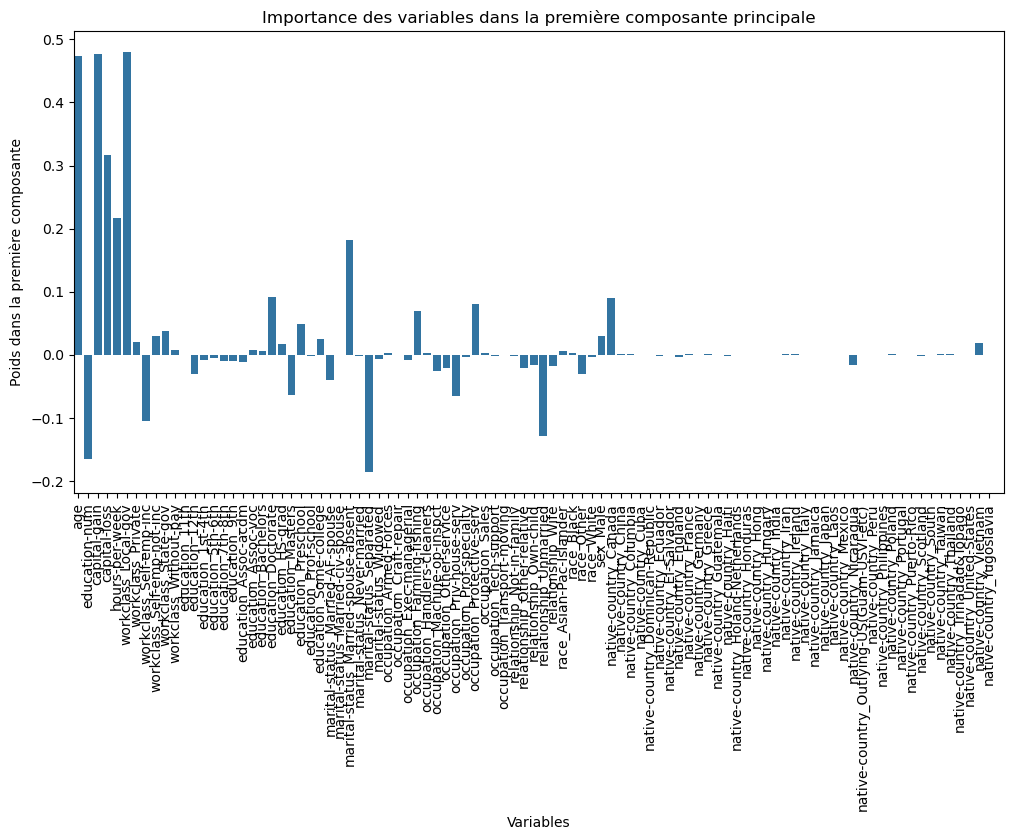

In [197]:
# Importance des variables dans la première composante principale (PC1)
plt.figure(figsize=(12, 6))
sns.barplot(x=np.arange(len(pca.components_[0])), y=pca.components_[0])
plt.xlabel("Variables")
plt.ylabel("Poids dans la première composante")
plt.title("Importance des variables dans la première composante principale")
plt.xticks(ticks=np.arange(len(df_processed.columns)), labels=df_processed.columns, rotation=90)
plt.show()

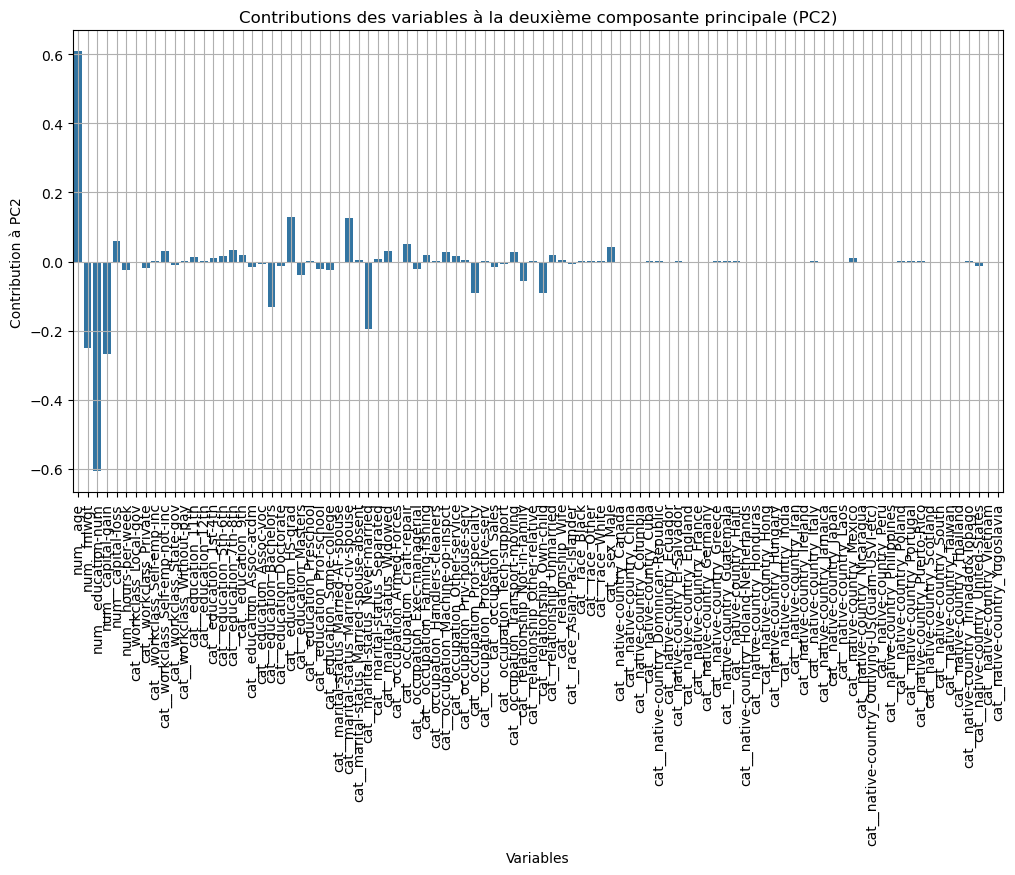

In [192]:
# Visualiser les contributions des variables à PC2
plt.figure(figsize=(12, 6))
sns.barplot(x=loadings_df.columns, y=loadings_df.loc['PC2'])
plt.xticks(rotation=90)
plt.xlabel('Variables')
plt.ylabel('Contribution à PC2')
plt.title('Contributions des variables à la deuxième composante principale (PC2)')
plt.grid(True)
plt.show()

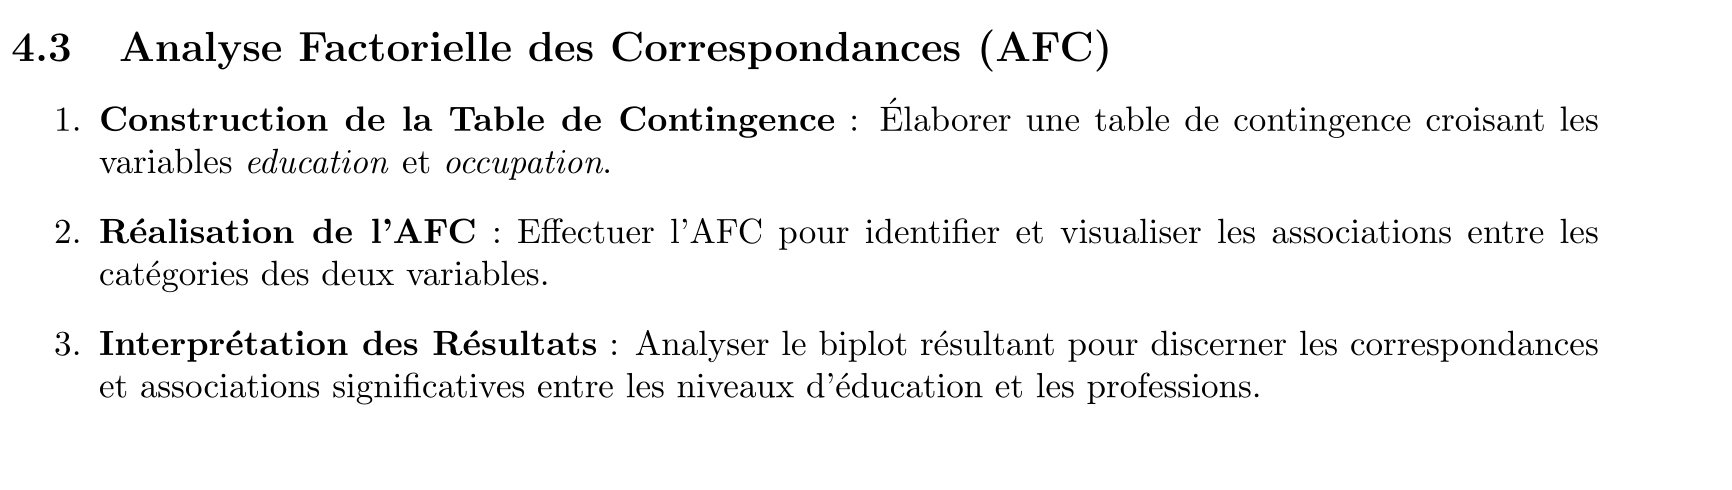


# **Introduction**

## L'Analyse Factorielle des Correspondances (AFC) est une méthode statistique qui permet d'explorer les relations entre deux variables catégorielles.
## Dans cette analyse, nous alons étudié les correspondances entre les niveaux d'éducation et les  professions à partir du jeu de données **Adult Income**.
## Le biplot résultant nous permet de visualiser ces relations dans un espace à deux dimensions.


In [9]:
import panel as pn
import hvplot.pandas
import ssl

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

In [7]:


# Activer Panel avec Tabulator
pn.extension('tabulator')

# Désactiver la vérification SSL
ssl._create_default_https_context = ssl._create_unverified_context

# URL du dataset
url_adult = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"

# Noms des colonnes
column_names_adult = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]

# Chargement des données avec mise en cache
if 'data_adult' not in pn.state.cache.keys():
    df_adult = pd.read_csv(
        url_adult, names=column_names_adult, sep=",", header=None, skipinitialspace=True
    )

    # Suppression des espaces superflus dans les colonnes textuelles
    str_cols = df_adult.select_dtypes(object).columns
    df_adult[str_cols] = df_adult[str_cols].apply(lambda x: x.str.strip())

    # Stockage en cache
    pn.state.cache['data_adult'] = df_adult.copy()
else:
    df_adult = pn.state.cache['data_adult']

# Détection des valeurs "?"
missing_mask = df_adult == "?"

# Création d'une copie du DataFrame pour affichage HTML
df_display = df_adult.copy()

# Remplacement des valeurs "?" par une version colorée en HTML
for col in df_adult.columns:
    df_display[col] = df_adult[col].apply(
        lambda x: f'<span style="background-color:red; color:white; font-weight:bold; padding:3px;">{x}</span>' 
        if x == "?" else x
    )

# Récapitulatif des valeurs "?" par colonne
missing_counts = missing_mask.sum().reset_index()
missing_counts.columns = ["Variable", "Nombre de valeurs '?'"]

# Mise en couleur des cellules ayant des valeurs manquantes
for col in missing_counts.columns:
    missing_counts[col] = missing_counts[col].astype(str)

missing_counts["Nombre de valeurs '?'"] = missing_counts["Nombre de valeurs '?'"].apply(
    lambda x: f'<span style="background-color:red; color:white; font-weight:bold; padding:3px;">{x}</span>'
    if x != "0" else x
)

# Création du tableau interactif avec mise en rouge des valeurs non nulles
missing_table = pn.widgets.Tabulator(
    missing_counts,
    pagination='remote', 
    page_size=20,
    formatters={col: {"type": "html"} for col in missing_counts.columns},  # Activation HTML
    configuration={"layout": "fitDataStretch"}
)

# Configuration du tableau principal avec formatage HTML
table = pn.widgets.Tabulator(
    df_display, 
    pagination='remote', 
    page_size=10, 
    formatters={col: {"type": "html"} for col in df_adult.columns},  # Activer l'affichage HTML
    configuration={"layout": "fitDataStretch"}
)

# Affichage interactif du tableau avec le résumé des valeurs manquantes
dashboard = pn.Column(
    "## 📋 Tableau des données avec valeurs `?` mises en rouge",
    table,
    "# Dataset Adult - Valeurs manquantes",
    "🔴 **Toutes les cellules contenant `?` sont colorées en rouge.**",
    "## Nombre de valeurs `?` par colonne (les valeurs non nulles sont mises en rouge)",
    "## variables catégorielles contenant des valeurs manquantes sont: workclass, occupation, native-country" ,
    missing_table,
    
)

dashboard.servable()

Column
    [0] Markdown(str)
    [1] Tabulator(formatters={'age': {'type': 'html'}, ...}, page_size=10, pagination='remote', value=       age    ...)
    [2] Markdown(str)
    [3] Markdown(str)
    [4] Markdown(str)
    [5] Markdown(str)
    [6] Tabulator(formatters={'Variable': {'type': 'htm...}, page_size=20, pagination='remote', value=          Variable  ...)

In [9]:
import pandas as pd
import numpy as np
import panel as pn
import hvplot.pandas
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler

# Activer l'extension Panel pour hvplot
pn.extension()

# Chargement des données
url_adult = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"

# Noms des colonnes
column_names_adult = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]

df_adult = pd.read_csv(
    url_adult, names=column_names_adult, sep=",", header=None, skipinitialspace=True
)

# Suppression des espaces superflus dans les colonnes textuelles
str_cols = df_adult.select_dtypes(object).columns
df_adult[str_cols] = df_adult[str_cols].apply(lambda x: x.str.strip())

# Étape 1 : Construction de la Table de Contingence
contingency_table = pd.crosstab(df_adult['education'], df_adult['occupation'])

# Étape 2 : Réalisation de l'AFC (Analyse Factorielle des Correspondances)
# Normalisation de la table de contingence
table_scaled = contingency_table.div(contingency_table.sum(axis=1), axis=0)

# Application de la décomposition SVD pour extraire les axes principaux
svd = TruncatedSVD(n_components=2)
coord = svd.fit_transform(table_scaled)

# Création d'un DataFrame pour les coordonnées des modalités
df_afc = pd.DataFrame(coord, columns=['Dim1', 'Dim2'], index=contingency_table.index)

# Étape 3 : Visualisation avec hvplot
afc_plot = df_afc.hvplot.scatter(
    x='Dim1', y='Dim2', hover_cols=['index'], title="Biplot de l'AFC",
    xlabel='Dimension 1', ylabel='Dimension 2', color='red', size=100,
    height=500, width=800
)

# Étape 4 : Affichage de la table de contingence
contingency_table_pane = pn.pane.DataFrame(
    contingency_table,
    sizing_mode='stretch_width',
    name='Table de Contingence'
)

# Étape 5 : Création d'un tableau de bord interactif avec Panel
dashboard = pn.Column(
    "## Analyse Factorielle des Correspondances (AFC)",
    "### Table de Contingence : Education vs Occupation",
    contingency_table_pane,
    "### Biplot des modalités",
    afc_plot
)

# Affichage du tableau de bord
dashboard.servable()

Column
    [0] Markdown(str)
    [1] Markdown(str)
    [2] DataFrame(DataFrame, name='Table de Contingence', sizing_mode='stretch_width')
    [3] Markdown(str)
    [4] HoloViews(Scatter, height=500, sizing_mode='fixed', width=800)

In [10]:


# Suppression des espaces superflus dans les colonnes textuelles
str_cols = df_adult.select_dtypes(object).columns
df_adult[str_cols] = df_adult[str_cols].apply(lambda x: x.str.strip())

# Étape 1 : Construction de la table de contingence entre `education` et `occupation`
cont_table = pd.crosstab(df_adult['education'], df_adult['occupation'])

# Étape 2 : Réalisation de l'AFC
# Normalisation de la table de contingence
table_scaled = cont_table.div(cont_table.sum(axis=1), axis=0)

# Application de la décomposition SVD pour extraire les axes principaux
svd = TruncatedSVD(n_components=2)
coord_rows = svd.fit_transform(table_scaled)

# Coordonnées des modalités `education`
row_labels = cont_table.index.tolist()
df_education_coords = pd.DataFrame(coord_rows, columns=['Dim1', 'Dim2'], index=row_labels)
df_education_coords['Type'] = 'Education'

# Coordonnées des modalités `occupation`
coord_cols = svd.components_.T * svd.singular_values_
col_labels = cont_table.columns.tolist()
df_occupation_coords = pd.DataFrame(coord_cols, columns=['Dim1', 'Dim2'], index=col_labels)
df_occupation_coords['Type'] = 'Occupation'

# Fusion des données pour le biplot
df_afc = pd.concat([df_education_coords, df_occupation_coords])

# Étape 3 : Visualisation interactive avec hvplot
biplot = df_afc.hvplot.scatter(
    x='Dim1', y='Dim2', by='Type', hover_cols=['Type'],
    title="Biplot AFC : Education vs Occupation",
    legend='top_right',
    width=1000,  # Augmentation de la largeur du graphique
    height=600   # Augmentation de la hauteur du graphique
)

# Affichage du biplot interactif
biplot

:NdOverlay   [Type]
   :Scatter   [Dim1]   (Dim2,Type)

In [57]:
# Calcul de l’inertie expliquée
singular_vals = svd.singular_values_
inertias = (singular_vals**2) / np.sum(singular_vals**2) * 100
inertia_df = pd.DataFrame({
    'Dimension': ['Dim1', 'Dim2'],
    'Inertie (%)': inertias[:2]
})

# Affichage du tableau de l'inertie expliquée
print("\nInertie Expliquée par les Dimensions")
display(inertia_df)


Inertie Expliquée par les Dimensions


Dimension  Inertie (%)
0      Dim1    62.665988
1      Dim2    37.334012

### **Analyse et Interprétation du Biplot de l'AFC : Éducation vs. Occupation**

L’Analyse Factorielle des Correspondances (AFC) permet d’explorer les relations entre **deux variables qualitatives**, ici **le niveau d’éducation** (`education`) et **le type d’occupation** (`occupation`). Le **biplot** obtenu projette ces modalités dans un espace à **deux dimensions principales (Dim1 et Dim2)**, qui capturent une grande partie de l’information de la relation entre les deux variables.

---

## **1. Explication du Graphique**
- **Les points bleus représentent les niveaux d’éducation** (`Education`).
- **Les points rouges représentent les types d’emploi** (`Occupation`).
- **L’axe Dim1** est celui qui capte le plus de variance dans les relations éducation-emploi.
- **L’axe Dim2** est secondaire et représente des différences moins marquées.

Chaque point **représente une modalité**, et la **proximité entre un point Education et un point Occupation indique une association forte**.

---

## **2. Interprétation des Résultats**
### **a) Relation entre éducation et emploi**
- **Proximité des points Education et Occupation** :
  - Lorsque **un niveau d’éducation est proche d’un type d’occupation**, cela signifie que ce type d’emploi est plus fréquent pour les personnes ayant ce niveau d’éducation.
  - Par exemple, si **"High School" (éducation)** est proche de **"Blue-collar" (emploi manuel)**, cela indique que les personnes ayant un diplôme de lycée travaillent souvent dans des emplois manuels.
  - Si **"Bachelors" ou "Masters" est proche de "White-collar"**, cela traduit une corrélation forte entre diplômes universitaires et métiers de bureau.

- **Éloignement des points** :
  - Plus **deux modalités sont éloignées**, plus elles sont **faiblement associées**.
  - Si une modalité d'éducation est **loin de toutes les modalités d’occupation**, cela signifie qu'elle est **répartie de manière homogène** entre plusieurs types de professions.

---

### **b) Analyse des Axes Factorielles**
- **Dim1** (Axe horizontal) :  
  - Capture **l’opposition entre les niveaux d’éducation faible et élevé**.
  - Sépare généralement **les emplois peu qualifiés (travailleurs manuels, ouvriers) à gauche** et **les emplois qualifiés (professionnels, managers) à droite**.
  
- **Dim2** (Axe vertical) :  
  - Peut représenter des **variations secondaires**, comme des spécialisations au sein d’un même groupe.
  - Si certaines catégories de travail sont plus dispersées verticalement, cela peut refléter des nuances **régionales, sectorielles ou culturelles**.

---

### **c) Structure Globale**
- Si la **dispersion des points est forte**, cela signifie que les niveaux d’éducation influencent fortement la répartition des professions.
- Si certains points sont **très éloignés du centre**, ces modalités ont des caractéristiques **fortement distinctives** (exemple : un type d’emploi spécifique qui est quasi-exclusivement occupé par un certain niveau d’éducation).
- Si certains points sont **regroupés près du centre**, cela signifie que ces catégories sont **peu discriminantes**, c'est-à-dire qu’elles ne sont pas fortement associées à un emploi particulier.

---

## **3. Conclusions**
1. **La répartition des emplois est largement influencée par le niveau d’éducation**. Certains niveaux d’éducation sont fortement associés à certains types de professions.
2. **L’axe Dim1 semble principalement représenter la distinction entre professions qualifiées et non qualifiées**.
3. **Certaines catégories d’emploi sont très spécifiques à certains niveaux d’éducation**, tandis que d'autres sont plus généralistes.
4. **Les points proches révèlent des tendances claires : les travailleurs manuels sont souvent peu diplômés, tandis que les professions intellectuelles requièrent des études plus longues.**

---

